<a href="https://colab.research.google.com/github/ednavivianasegura/Curso_PLN/blob/Students/PLN_EDNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Clonar carpeta Github (Para acceder al dataset y a las distintas gr√°ficas) { form-width: "5%", display-mode: "form" }
import os
# Clona el repositorio
try:
    !git clone https://github.com/ednavivianasegura/Curso_PLN.git
except:
    pass

# Cambiar al directorio "Curso_PLN"
os.chdir("Curso_PLN")

***

<center>
<img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/Portada.png?raw=1" alt="portada" width="50%" height="50%">  
</center>

In [27]:
# @title Librer√≠as Necesarias durante todo el proceso { display-mode: "form" }
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.util import ngrams
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import random
from statistics import median
from scipy.stats import norm



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## ¬øQu√© es el procesamiento del lenguale natural (PLN)?

Supongamos que disponemos del siguiente texto:

*Natural Language Processing (NLP) is an interdisciplinary field that combines statistics, mathematics, and machine learning techniques to analyze and understand human language. In NLP, words, tokens, and their frequency play a crucial role in building models for language inference.
The foundation of Natural Language Processing lies in understanding the nominal, ordinal, and categorical aspects of language. By employing sophisticated algorithms, NLP systems can decipher the semantics and syntax of words and sentences. In NLP, the power of machine learning models is harnessed to process vast amounts of textual data, enabling tasks such as sentiment analysis, text summarization, and information extraction. Through the application of advanced algorithms, NLP practitioners strive to enhance the accuracy and efficiency of language processing systems.
Statistics and mathematics form the backbone of Natural Language Processing, providing the theoretical framework for modeling linguistic phenomena and deriving meaningful insights from textual data.
By leveraging statistical techniques, NLP algorithms can identify patterns, trends, and correlations within language corpora. In essence, Natural Language Processing is a multifaceted discipline that draws upon diverse domains such as linguistics, computer science, and artificial intelligence.
By exploring the intricate interplay between words, semantics, and context, NLP researchers continue to push the boundaries of language understanding and machine intelligence.*

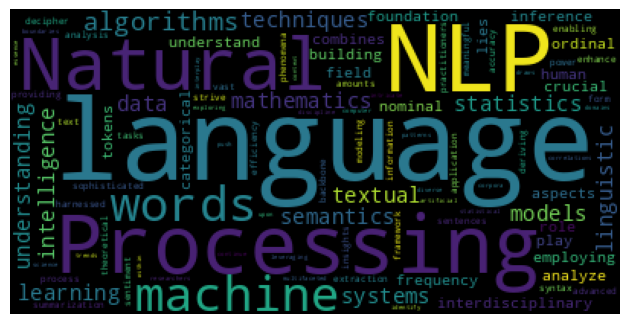

In [4]:
# @title Crea mapa de palabras
# Luego explicaremos con m√°s detalle este c√≥digo
stopword_en = nltk.corpus.stopwords.words('english')
#Creamos la lista de palabras
stopwords = set(stopword_en)
stopwords.update(["br", "href"])
text = """
Natural Language Processing (NLP) is an interdisciplinary field that combines statistics, mathematics,
and machine learning techniques to analyze and understand human language. In NLP, words, tokens,
and their frequency play a crucial role in building models for language inference.
The foundation of Natural Language Processing lies in understanding the nominal, ordinal,
and categorical aspects of language. By employing sophisticated algorithms, NLP systems can decipher
the semantics and syntax of words and sentences. In NLP, the power of machine learning models
is harnessed to process vast amounts of textual data, enabling tasks such as sentiment analysis,
text summarization, and information extraction. Through the application of advanced algorithms,
NLP practitioners strive to enhance the accuracy and efficiency of language processing systems.
Statistics and mathematics form the backbone of Natural Language Processing, providing the theoretical
framework for modeling linguistic phenomena and deriving meaningful insights from textual data.
By leveraging statistical techniques, NLP algorithms can identify patterns, trends, and correlations
within language corpora. In essence, Natural Language Processing is a multifaceted discipline
that draws upon diverse domains such as linguistics, computer science, and artificial intelligence.
By exploring the intricate interplay between words, semantics, and context, NLP researchers
continue to push the boundaries of language understanding and machine intelligence.
"""
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud,cmap='PiYG_r')
plt.axis("off")
plt.tight_layout()
# plt.savefig("mapa_palabras.png", bbox_inches='tight', pad_inches=0, dpi=600)
plt.show()

M√°s informaci√≥n sobre el PLN

## ¬øPara qu√© nos sirve la estad√≠stica en el PLN?

<center>
 <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/como_se_utiliza_la_Estadistica_en_pln.png?raw=1" alt="como se utiliza la estadistica en PLN" width="50%" height="50%">  
</center>


***
## ¬°Comencemos!
***

# Contenido



1.   Estad√≠stica descriptiva univariante

    *   Tablas de frecuencias.
    *   Gr√°ficos unidimensionales.
    *   Medidas de una variable cuantitativa:
        * de posici√≥n:
            * media aritm√©tica
            * mediana y cuantiles
            * moda
        * de dispersi√≥n:
            * absoluta: recorrido, (cuasi)varianza y (cuasi)desviaci√≥n t√≠pica
            * relativa: recorrido relativo, coeficiente de variaci√≥n y valores tipificados
    * An√°lisis de frecuencias de n-gramas.

2.   Introducci√≥n a la Teor√≠a de la Probabilidad
    *   Distribuci√≥n de probabilidad
    *   Variable aleatoria
    *   Probabilidad condicionada. Teorema de bayes.
3.   Inferencia estad√≠stica
    *   Conceptos b√°sicos.
    *   Casos de uso.

4.   Estad√≠stica multivariante
    *   Correlaci√≥n.
    *   Regresi√≥n.
    *   Clasificaci√≥n: lasificador bayesiano ingenuo.
5.  Modelizaci√≥n PLN
    * Modelos de lenguaje.
    * Modelos de etiquetado gramatical.
    * Modelos de aprendizaje autim√°tico para el PLN.  

***
***

# Estad√≠stica descriptiva univariante

<center>
 <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/desc-univariante.png?raw=1" alt="descriptiva" width="50%" height="50%">  
</center>

***
***

### ¬øSabemos qu√© es una variable o qu√© tipo de variables existen?

Una variable estad√≠stica es la expresi√≥n de una caracter√≠stica de una poblaci√≥n. Lo habitual es disponer de los datos de esa variable en una muestra que sea parte de esa poblaci√≥n.

Existen, a grandes rasgos, dos tipos de variables:

*   Variables num√©ricas
  *   Discretas (cardinalidad finita o numerable): es un tipo de variable cuantitativa que solo puede tomar valores aislados, generalmente enteros, que se obtienen mediante un conteo.
  
        Ejemplo: el n√∫mero de letras de una palabra.

  *   Continuas (cardinalidad infinita): es un tipo de variable cuantitativa que puede tomar cualquier valor dentro de un intervalo, que se obtienen mediante una medici√≥n. Admite valores intermedios o decimales. Ejemplo: la longitud de una palabra.

*   Variables categ√≥ricas: es un tipo de variable que describen cualidades de los datos.
  *   Las variables ordinales: se pueden ordenar linealmente.
  
        Ejemplo: categorizar las palabras seg√∫n su longitud en diferentes grupos ordenados, como:
        * Palabras cortas (1-3 caracteres)
        * Palabras de longitud media (4-6 caracteres)
        * Palabras largas (7 o m√°s caracteres)

  *   Variables nominales: establecen categor√≠as que no est√°n intr√≠nsecamente ordenadas.
  
        Ejemplo: categor√≠as gramaticales, como sustantivos, verbos, adjetivos, adverbios, pronombres, preposiciones, conjunciones, entre otros.
  
  En sentido estricto, las cadenas de texto procedentes de un lenguaje son variables ordinales. Sin embargo, podr√≠amos establecer el texto como un tipo de variable por s√≠ misma, ya que tiene sus particularidades.






In [38]:
# @title Funciones predise√±adas necesarias durante el proceso
#Estas funciones se explican posteriormente

def group_by_sturges(df, column):
    num_bins = int(np.ceil(np.log2(len(df[column])) + 1))
    bin_width = (df[column].max() - df[column].min()) / num_bins
    bins, bin_edges = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True)

    # Generar etiquetas para los intervalos basados en los l√≠mites de los intervalos
    labels = [f"[{int(round(bin_edges[i],0))}-{int(round(bin_edges[i+1],0))})" for i in range(len(bin_edges)-1)]
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True, labels=labels)[0]
    return bins

def group_by_sqrt(df, column):
    num_bins = int(math.sqrt(df.shape[0]))
    bin_width = int((df[column].max() - df[column].min()) / num_bins)
    bins, bin_edges = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True)

    # Generar etiquetas para los intervalos basados en los l√≠mites de los intervalos
    labels = [f"[{int(round(bin_edges[i],0))}-{int(round(bin_edges[i+1],0))})" for i in range(len(bin_edges)-1)]
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True, labels=labels)[0]
    return bins

def marca_de_clase(intervalo):
    limite_inferior, limite_superior = map(float, intervalo.strip("[]()").split('-'))
    return (limite_inferior + limite_superior) / 2

***
### Notaci√≥n:
***

Establecemos la siguiente notaci√≥n para lo que sigue.
* De una variable $X$ tenemos $N$ datos (casos) que pueden ser repetidos o no: $ùëã_1,ùëã_2,‚Ä¶,ùëã_ùëÅ$ (*en may√∫sculas*).
* Si solo indicamos los valores distintos entre s√≠: $ùë•_1,ùë•_2,‚Ä¶,ùë•_ùêæ$ (*en min√∫sculas*) cada uno con su respectiva frecuencia $ùëõ_1,ùëõ_2,‚Ä¶,ùëõ_ùêæ$.


**Notas:**
$ùëÅ=ùëõ_1+ùëõ_2+‚ãØ+ùëõ_ùêæ=‚àëùëõ_ùëñ$ representa el n√∫mero de casos (el tama√±o de la muestra).

$ùêæ$ representa el n√∫mero de valores distintos entre s√≠ de la variable $ùëã$.

***

### Ejemplo de conjunto de datos:

Conjunto de datos de *Amazon Fine Food Reviews de¬†Kaggle*¬†(archivo disponible en [Reviews.csv](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)).

Cuenta con un total de ***568454*** rese√±as de productos de ***Amazon***.

En este proyecto, para aligerar la intensidad computacional, utilizaremos una *muestra* obtenida de forma aleatoria, que contiene ***45476*** rese√±as.

Recurriremos a este conjunto datos reducido para ilustrar muchos de los ejemplos que realizaremos durante el curso.

Las variables de este conjunto de datos son:

* ProductId - Identificador del producto.
* ProfileName - nombre del usuario.
* HelpfulnessNumerator - fracci√≥n de usuarios a los que les result√≥ √∫til la rese√±a.
* Score ‚Äì clasificaci√≥n del producto.
* Time -  hora de la rese√±a.
* Summary ‚Äì Breve resumen de la rese√±a.
* Text ‚Äì Rese√±a completa del art√≠culo.



In [5]:
# @title Importar conjunto de datos
df = pd.read_csv('Reviews.csv')
#muestra: N
N=df.shape[0]
print(f"Informaci√≥n disponible en el dataframe:\n{list(df.columns)}\nEl dataframe contiene {N} rese√±as\n")
display(df.loc[:,['Id', 'ProductId', 'ProfileName', 'Score', 'Time', 'Summary', 'Text']].head())

Informaci√≥n disponible en el dataframe:
['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
El dataframe contiene 45476 rese√±as



Id   ProductId             ProfileName  Score        Time  \
0  165257  B000EVG8J2  B. Miller "pet person"      5  1268179200   
1  231466  B0000BXJIS                   Marty      5  1298937600   
2  427828  B008FHUFAU         Kenneth Shevlin      3  1224028800   
3  433955  B006BXV14E             rareoopdvds      2  1335312000   
4   70261  B007I7Z3Z0                  Og8ys1      5  1334707200   

                                        Summary  \
0  Crunchy & Good Gluten-Free Sandwich Cookies!   
1                            great kitty treats   
2                                  COFFEE TASTE   
3              So the Mini-Wheats were too big?   
4                             Great Taste . . .   

                                                Text  
0  Having tried a couple of other brands of glute...  
1  My cat loves these treats. If ever I can't fin...  
2  A little less than I expected.  It tends to ha...  
3  First there was Frosted Mini-Wheats, in origin...  
4  and I want to congratulate the graphic artist ...

Para complementar la informaci√≥n proporcionada por el dataframe, se crean dos variables adicionales, una llamada *Longitud_Texto* que cuenta el n√∫mero de palabras en cada rese√±a y otra, llamada *Num_Palabras_Unicas* que cuenta el n√∫mero de palabras √∫nicas (es decir sin que se repitan) en cada rese√±a.

In [31]:
# @title Crear dos variables nuevas
# Creamos una nueva variable que contiene el n√∫mero de palabras que componene
# Contar la longitud de las palabras en la columna 'texto'
df['Longitud_Texto'] = df['Text'].apply(lambda x: len(x.split()))
# Calcula el n√∫mero de palabras √∫nicas en la columna 'Text'
df['Num_Palabras_Unicas'] = df['Text'].apply(lambda x: len(set(x.split())))

display(df.loc[:,['Id','Score', 'Summary', 'Text','Longitud_Texto','Num_Palabras_Unicas']].head())


Id  Score                                       Summary  \
0  165257      5  Crunchy & Good Gluten-Free Sandwich Cookies!   
1  231466      5                            great kitty treats   
2  427828      3                                  COFFEE TASTE   
3  433955      2              So the Mini-Wheats were too big?   
4   70261      5                             Great Taste . . .   

                                                Text  Longitud_Texto  \
0  Having tried a couple of other brands of glute...              84   
1  My cat loves these treats. If ever I can't fin...              99   
2  A little less than I expected.  It tends to ha...              28   
3  First there was Frosted Mini-Wheats, in origin...             294   
4  and I want to congratulate the graphic artist ...             122   

   Num_Palabras_Unicas  
0                   64  
1                   75  
2                   26  
3                  191  
4                   88

***
## TABLA DE FRECUENCIAS
***

Tambi√©n denominadas tabulaciones, resumen los datos de una variable.

Para cada valor observado $ùë•_{ùëñ}$, en la tabla se indica:
* La frecuencia absoluta $ùëõ_{ùëñ}$ es el n√∫mero de veces que se da el valor $ùë•_{ùëñ}$.
* La frecuencia relativa $ùëì_{ùëñ}=\frac{ùëõ_{ùëñ}}{ùëÅ}$ donde $ùëÅ$ es el n√∫mero de casos. Notas:
    * $0 < f_{ùëñ} \leq1$, representa la proporci√≥n de $ùë•_{ùëñ}$;
    * se suele expresar en porcentaje: $ùëì_{ùëñ}\times100$%.

Si la variable es cuantitativa o si es ordinal (esto es, sus valores se pueden ordenar), ordenamos los valores observados de manera creciente $ùë•_{1}<ùë•_{2}<‚ãØ$ y tambi√©n indicamos:
* La frecuencia absoluta acumulada $ùëÅ_{ùëñ}=ùëõ_{1}+ùëõ_{2}+‚ãØ+ùëõ_{ùëñ}$ es el n√∫mero de casos menores o iguales que $ùë•_{ùëñ}$.
* La frecuencia relativa acumulada $ùêπ_{ùëñ}=ùëì_{1}+ùëì_{2}+‚ãØ+ùëì_{ùëñ}$ . Notas:
    * $0 < F_{ùëñ} \leq1$, representa la proporci√≥n de valores menores o iguales que $ùë•_{ùëñ}$;
    * tambi√©n se suele expresar en tanto por ciento: $ùêπ_{ùëñ}\times100$%.


In [8]:
# @title **Ejercicio:** Crear la tabla de frecuencias de la variable *longitud de palabras*:

#Creamos la tabla de frecuencias de la variable "longitud de palabras":

frecuencias_long = df['Longitud_Texto'].value_counts()
frecuencias_long = frecuencias_long.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_long / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_long.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_long.index,
    'n_i': frecuencias_long.values,
    'f_i': frecuencias_relativas.values,
    'N_i':frecuencias_acumuladas.values,
    'F_i':frecuencias_relativas_acum.values
})
print("Tabla de frecuencias de la columna\n'Longitud del texto\n(n√∫mero de palabras dentro de cada rese√±a)':\n")
display(tabla_frecuencias)

Tabla de frecuencias de la columna
'Longitud del texto
(n√∫mero de palabras dentro de cada rese√±a)':



x_i  n_i       f_i    N_i       F_i
0       6    1  0.000022      1  0.000022
1       7    5  0.000110      6  0.000132
2       9    1  0.000022      7  0.000154
3      10    3  0.000066     10  0.000220
4      11    7  0.000154     17  0.000374
..    ...  ...       ...    ...       ...
593  1447    1  0.000022  45472  0.999912
594  1513    1  0.000022  45473  0.999934
595  1600    1  0.000022  45474  0.999956
596  1736    1  0.000022  45475  0.999978
597  1901    1  0.000022  45476  1.000000

[598 rows x 5 columns]

### TABLA DE FRECUECIAS POR INTERVALOS

Si una variable cuenta con una gran cantidad de valores distintos, como es el caso de la variable *Longitud del texto*, a menudo se resumen en una tabla de frecuencias, reduci√©ndola por intervalos. En este caso la frecuencia, $ùëõ_ùëñ$, es el n√∫mero de casos cuyos valores se encuentran en el ùëñ-√©simo intervalo.

***Intervalos***:
Cada intervalo est√° determinado por sus l√≠mites. Esto es, el intervalo $ùëé‚ü∑ùëè$ representa los valores comprendidos entre $ùëé$ y $ùëè$.


Si se requiere determinar la ubicaci√≥n de los l√≠mites, estos pueden ser referidos con una notaci√≥n m√°s completa. Generalmente se utilizan intervalos abiertos por la izquierda y cerrados por la derecha: $(ùëé,ùëè]$. Esto es, incluye los valores comprendidos entre $ùëé$ y $ùëè$, $ùëè$ incluido y $ùëé$ excluido.

La amplitud de intervalo $ùëé‚ü∑ùëè$ es $ùëè‚àíùëé$, que tambi√©n es la amplitud de los intervalos $(ùëé,ùëè]$ y $[ùëé,ùëè)$ (este √∫ltimo intervalo representa los valores mayores o iguales que $ùëé$ y menores que $ùëè$).

En las tablas de frecuencias los intervalos pueden ser de amplitud constante (m√°s c√≥modo) o variable.

La densidad de frecuencia de un intervalo es la raz√≥n de su frecuencia absoluta sobre su amplitud. El intervalo $ùëñ$ con frecuencia absoluta $ùëõ_ùëñ$ y amplitud $ùëé_ùëñ$ tiene una densidad de frecuencia $‚Ñé_ùëñ=ùëõ_ùëñ/ùëé_ùëñ$.


En las variables cuantitativas la marca de clase de un intervalo es el valor concreto de la variable que representa cada intervalo, generalmente se toma el punto medio del intervalo. El punto medio de $(ùëé,ùëè]$ es: $(a+b)/2$. Para calcular medidas cuantitativas de una variable reducida por intervalos se usan las marcas de clase.

***Algunos m√©todos disponibles para calcular el n√∫mero de intervalos:***

Llamaremos $k$ al n√∫mero de intervalos y $N$ al n√∫mero de datos.

Si $N > 100$ $k = [ 10, 20 ]$

* Regla de Sturges:

$$k = 1 + 3.322 \log_{10}(N)$$

* Regla de la ra√≠z cuadrada: si $N < 100$ no convine que $k > \sqrt{N}$
$$k = \sqrt{N}$$







In [44]:
# @title **Ejemplo**: Resumimos los valores de la variable *Longitud del texto* por los intervalos indicados.

print("--------------------------------------------------------------------\nTras hacer el recuento obtenemos la siguiente tabla.\n--------------------------------------------------------------------\n")
# Calcular los grupos usando la funci√≥n creada group_by_sturges
df['group_sturges'] = group_by_sturges(df, 'Longitud_Texto')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()
print("\nFrecuencias usando el m√©todo de sturges\n")

# Calcular la marca de clase para cada intervalo
MarcaDeClase = list(map(marca_de_clase, list(frecuencias_grupo.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_Longitud_Texto = pd.DataFrame({
    'x_i': frecuencias_grupo.index,
    'n_i': frecuencias_grupo.values,
    'MarcaDeClase':MarcaDeClase})

print(tabla_frecuencias_Longitud_Texto)
# print(frecuencias_grupo.index)
# print(MarcaDeClase)


--------------------------------------------------------------------
Tras hacer el recuento obtenemos la siguiente tabla.
--------------------------------------------------------------------


Frecuencias usando el m√©todo de sturges

            x_i    n_i  MarcaDeClase
0       [6-117)  37157          61.5
1     [117-229)   6342         173.0
2     [229-340)   1298         284.5
3     [340-452)    394         396.0
4     [452-563)    167         507.5
5     [563-675)     42         619.0
6     [675-786)     23         730.5
7     [786-898)     33         842.0
8    [898-1009)      7         953.5
9   [1009-1121)      2        1065.0
10  [1121-1232)      2        1176.5
11  [1232-1344)      2        1288.0
12  [1344-1455)      3        1399.5
13  [1455-1567)      1        1511.0
14  [1567-1678)      1        1622.5
15  [1678-1790)      1        1734.0
16  [1790-1903)      1        1846.5


Podemos ver que hay varios intervalos con muy poca densidad de frecuencia, por lo que podemos unir los intervalos consecutivos en uno solo:

In [43]:
# @title Unir los grupos con poca frecuencia en uno solo:
# agrupar los √∫ltimos grupos en uno solo:

lista=[ '[898-1009)', '[1009-1121)', '[1121-1232)', '[1232-1344)',
                  '[1344-1455)', '[1455-1567)', '[1567-1678)', '[1678-1790)',
                  '[1790-1903)']

# Reemplazar los valores en la columna 'columna_original' con ">1472.571" si coinciden con los valores de la lista
df['group_sturges'] = df['group_sturges'].replace(lista, '[897.76-1902.9]')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_gr = frecuencias_grupo / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_gr = frecuencias_grupo.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_gr = frecuencias_acumuladas_gr / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias_gr = pd.DataFrame({
    'x_i': frecuencias_grupo.index,
    'n_i': frecuencias_grupo.values,
    'f_i': frecuencias_relativas_gr.values,
    'N_i':frecuencias_acumuladas_gr.values,
    'F_i':frecuencias_relativas_acum_gr.values
})


print("Tabla de frecuencias agrupadas por intervalo de la columna\n'Longitud del texto':\n")
display(tabla_frecuencias_gr)


Tabla de frecuencias agrupadas por intervalo de la columna
'Longitud del texto':



x_i    n_i       f_i    N_i       F_i
0          [6-117)  37157  0.817068  37157  0.817068
1        [117-229)   6342  0.139458  43499  0.956527
2        [229-340)   1298  0.028543  44797  0.985069
3        [340-452)    394  0.008664  45191  0.993733
4        [452-563)    167  0.003672  45358  0.997405
5        [563-675)     42  0.000924  45400  0.998329
6        [675-786)     23  0.000506  45423  0.998835
7        [786-898)     33  0.000726  45456  0.999560
8  [897.76-1902.9]     20  0.000440  45476  1.000000

In [45]:
# @title TabFreq_conteo_unico { display-mode: "form" }
#Creamos la tabla de frecuencias de la variable "Num_Palabras_Unicas":

frecuencias_long_unic = df['Num_Palabras_Unicas'].value_counts()
frecuencias_long_unic = frecuencias_long_unic.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_unic = frecuencias_long_unic / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_unic = frecuencias_long_unic.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_unic = frecuencias_relativas_unic / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias_unic = pd.DataFrame({
    'x_i': frecuencias_long_unic.index,
    'n_i': frecuencias_long_unic.values,
    'f_i': frecuencias_relativas_unic.values,
    'N_i':frecuencias_acumuladas_unic.values,
    'F_i':frecuencias_relativas_acum_unic.values
})



# Calcular los grupos usando la funci√≥n creada group_by_sturges
df['group_sturges_unic'] = group_by_sturges(df, 'Num_Palabras_Unicas')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo_unic = df['group_sturges_unic'].value_counts()
frecuencias_grupo_unic = frecuencias_grupo_unic.sort_index()
print("\nFrecuencias usando el m√©todo de sturges en conteo √∫nico\n")

# Calcular la marca de clase para cada intervalo
MarcaDeClase_unic = list(map(marca_de_clase, list(frecuencias_grupo_unic.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_Num_Palabras_Unicas = pd.DataFrame({
    'x_i': frecuencias_grupo_unic.index,
    'n_i': frecuencias_grupo_unic.values,
    'MarcaDeClase':MarcaDeClase_unic})

print(tabla_frecuencias_Num_Palabras_Unicas)





Frecuencias usando el m√©todo de sturges en conteo √∫nico

          x_i    n_i  MarcaDeClase
0      [6-55)  27209          30.5
1    [55-105)  12774          80.0
2   [105-154)   3696         129.5
3   [154-203)   1081         178.5
4   [203-253)    387         228.0
5   [253-302)    161         277.5
6   [302-351)     87         326.5
7   [351-401)     24         376.0
8   [401-450)     36         425.5
9   [450-500)      7         475.0
10  [500-549)      3         524.5
11  [549-598)      1         573.5
12  [598-648)      3         623.0
13  [648-697)      4         672.5
14  [697-746)      1         721.5
15  [746-796)      1         771.0
16  [796-846)      1         821.0


In [46]:
# @title **Ejercicio:** Resumimos los valores de la variable *Score*, realizando los conteos necesarios

print("--------------------------------------------------------------------------------\nTras hacer el recuento obtenemos la siguiente tabla.\n--------------------------------------------------------------------------------")
# Calcular la tabla de frecuencias de la columna 'Score'
frecuencias_score = df['Score'].value_counts()
frecuencias_score = frecuencias_score.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_score / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_score.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)


# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_score.index,
    'n_i': frecuencias_score.values,
    'f_i': frecuencias_relativas.values,
    "N_i":frecuencias_acumuladas.values,
    "F_i":frecuencias_relativas_acum.values
})
display(tabla_frecuencias)

--------------------------------------------------------------------------------
Tras hacer el recuento obtenemos la siguiente tabla.
--------------------------------------------------------------------------------


x_i    n_i       f_i    N_i       F_i
0    1   4144  0.091125   4144  0.091125
1    2   2347  0.051610   6491  0.142735
2    3   3439  0.075622   9930  0.218357
3    4   6411  0.140975  16341  0.359332
4    5  29135  0.640668  45476  1.000000

Observa la tabla de frecuencias del puntaje (score) de las rese√±as de Amazon y contesta a las siguientes preguntas:


1.   ¬øCu√°ntas rese√±as fueron valoradas con 4?
2.   ¬øCu√°ntas rese√±as fueron valoradas con menos de 3?
3.   ¬øCu√°ntas rese√±as tienen 4 o menos de valoraci√≥n?
4.   ¬øCu√°ntas rese√±as tienen m√°s de 4 puntos de valoraci√≥n?
5.   ¬øCu√°l es la proporci√≥n de rese√±as con puntaje igual a 3?
6.   ¬øCu√°l es la proporci√≥n de rese√±as menores a 3?
7.   ¬øCu√°l es la proporci√≥n de rese√±as mayores de 2?



***


In [13]:
# @title Respuesta:
print(f"1. ¬øCu√°ntas rese√±as fueron valoradas con 4?: {tabla_frecuencias[tabla_frecuencias['x_i']==4]['n_i'].values[0]}")
print(f"2. ¬øCu√°ntas rese√±as fueron valoradas con menos de 3?: {tabla_frecuencias[tabla_frecuencias['x_i']<3]['n_i'].values.sum()}")
print(f"3. ¬øCu√°ntas rese√±as tienen 4 o menos de valoraci√≥n?: {tabla_frecuencias[tabla_frecuencias['x_i']<5]['n_i'].values.sum()}")
print(f"4. ¬øCu√°ntas rese√±as tienen m√°s de 4 puntos de valoraci√≥n?: {tabla_frecuencias[tabla_frecuencias['x_i']>4]['n_i'].values.sum()}")
print(f"5. ¬øCu√°l es la proporci√≥n de rese√±as con puntaje igual a 3?: {round(tabla_frecuencias[tabla_frecuencias['x_i']==3]['f_i'].values.sum(),4)} √≥ {round(tabla_frecuencias[tabla_frecuencias['x_i']==3]['f_i'].values.sum()*100,4)}%")
print(f"6. ¬øCu√°l es la proporci√≥n de rese√±as menores a 3?: {round(tabla_frecuencias[tabla_frecuencias['x_i']==2]['F_i'].values[0],4)} √≥ {round(tabla_frecuencias[tabla_frecuencias['x_i']==2]['F_i'].values[0]*100,4)}%")
print(f"7. ¬øCu√°l es la proporci√≥n de rese√±as mayores de 2?: {round(tabla_frecuencias[tabla_frecuencias['x_i']>2]['f_i'].values.sum(),3)} √≥ {round(tabla_frecuencias[tabla_frecuencias['x_i']>2]['f_i'].values.sum()*100,3)}%")

1. ¬øCu√°ntas rese√±as fueron valoradas con 4?: 6411
2. ¬øCu√°ntas rese√±as fueron valoradas con menos de 3?: 6491
3. ¬øCu√°ntas rese√±as tienen 4 o menos de valoraci√≥n?: 16341
4. ¬øCu√°ntas rese√±as tienen m√°s de 4 puntos de valoraci√≥n?: 29135
5. ¬øCu√°l es la proporci√≥n de rese√±as con puntaje igual a 3?: 0.0756 √≥ 7.5622%
6. ¬øCu√°l es la proporci√≥n de rese√±as menores a 3?: 0.1427 √≥ 14.2735%
7. ¬øCu√°l es la proporci√≥n de rese√±as mayores de 2?: 0.857 √≥ 85.727%


***
***

### ALGUNOS TIPOS DE GR√ÅFICOS

Para variables **discretas** (toman pocos valores distintos):

* Gr√°ficos de sectores: cada valor ocupa un sector circular cuya proporci√≥n de √°rea (con respecto al c√≠rculo que representa el total) es la frecuencia relativa.  
* Gr√°ficos de barras. De dos tipos:
  * de valores: una barra por cada caso ($ùëÅ$ barras), de manera que la altura de barra ùëñ-√©sima expresa el valor ùëã_ùëñ;
  * de frecuencias: una barra por cada valor distinto $ùë•_ùëñ$, de manera que la altura de la barra $ùë•_ùëñ$ expresa su frecuencia absoluta $ùëõ_ùëñ$.

Para variables **continuas** (toman un amplio rango de posibles valores):
* histogramas.
Son gr√°ficos de rect√°ngulos pegados cuyas bases representan los intervalos determinados y cuyas alturas representan sus densidades ($‚Ñé_ùëñ/ùëÅ$).

    Se puede considerar que son gr√°ficos de barras de frecuencias especiales.

* Gr√°ficos para PLN:
    * Nube (mapa) de palabras (Que vimos al principio).
    


Text(0.5, 1.0, 'Gr√°fico de frecuencia del Score')

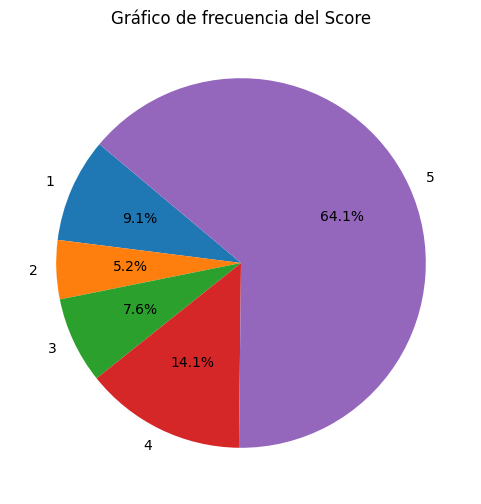

In [14]:
# @title Gr√°fico de sectores:
sizes = tabla_frecuencias.n_i
labels = tabla_frecuencias.x_i

plt.figure(figsize=(6, 6))  # Tama√±o del gr√°fico (opcional)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Agregar un t√≠tulo
plt.title('Gr√°fico de frecuencia del Score')
# plt.savefig("Pie_chart_score.png", bbox_inches='tight', pad_inches=0, dpi=600)

Frecuencias por tipo de sentimiento:
Malo (1-2)      6491
Neutral (3)     3439
Bueno (4-5)    35546
Name: sentiment, dtype: int64


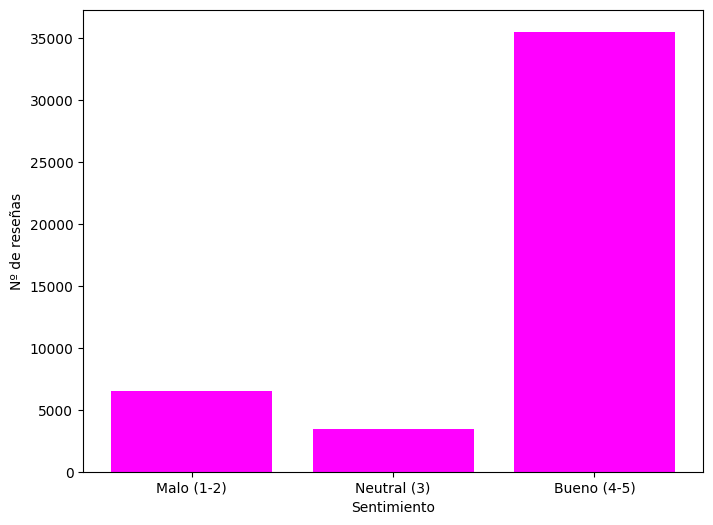

In [15]:
# @title **Gr√°fico de barras**: Para visualizar un ejemplo, creamos una nueva variable ***Sentiment*** que divide en tres grupos las rese√±as. Las rese√±as con Score de 1, 2 son catalogadas como *Malo*, Score de 3 como *Neutral* y Score de 4 o 5 son catalogadas como *Buenas*.

#Primero clasificaremos las rese√±as en doos grupos (buenas o malas)
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# score = 3 Neutral
df['sentiment'] = pd.cut(df['Score'], bins=[1,3,4,6], labels=['Malo (1-2)', 'Neutral (3)', 'Bueno (4-5)'], right=False)

frecuencias_sentiment = df['sentiment'].value_counts()
frecuencias_sentiment = frecuencias_sentiment.sort_index()

print(f"Frecuencias por tipo de sentimiento:\n{frecuencias_sentiment}")

# Datos de ejemplo
labels = frecuencias_sentiment.index
sizes = frecuencias_sentiment.values

# Crear el gr√°fico de barras
plt.figure(figsize=(8, 6))  # Tama√±o del gr√°fico (opcional)
plt.bar(labels, sizes, color='magenta')

# Agregar etiquetas y t√≠tulo
plt.ylabel('N¬∫ de rese√±as')
plt.xlabel('Sentimiento')
# plt.title('Gr√°fico de sentimeinto')
# plt.savefig("bar_chart_score_agrupado.png", bbox_inches='tight', pad_inches=0, dpi=600)

# Mostrar el gr√°fico
plt.show()

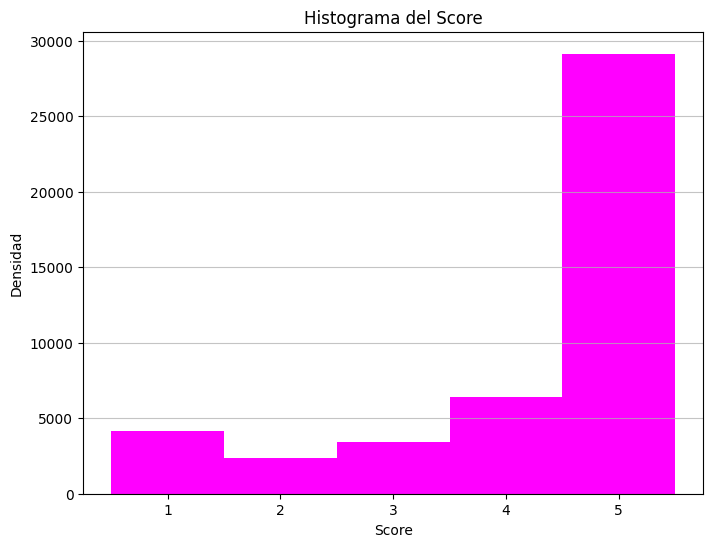

Frecuencia del bin 1.0 - 2.0: 4144.0
Frecuencia del bin 2.0 - 3.0: 2347.0
Frecuencia del bin 3.0 - 4.0: 3439.0
Frecuencia del bin 4.0 - 5.0: 6411.0
Frecuencia del bin 5.0 - 6.0: 29135.0


In [ ]:
# @title **Histograma:** Histograma del puntaje de las rese√±as (Score):

data=list(df['Score'].values)
# Crear el histograma con las barras juntas y densidad
plt.figure(figsize=(8, 6))  # Tama√±o del gr√°fico (opcional)
values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

# Agregar etiquetas y t√≠tulo
plt.xlabel('Score')
plt.ylabel('Densidad')
plt.title('Histograma del Score')

# Mostrar el histograma
plt.grid(axis='y', alpha=0.75)
plt.show()

#para mostrar las frecuencias reltativas en vez de las aboslutas usar: values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

for i in range(len(values)):
    print(f"Frecuencia del bin {bins[i]} - {bins[i+1]}: {values[i]}")

***
***
## Medidas de posici√≥n: media, mediana, cuantiles y moda.
***
***

Para hacer manejable la masa de datos procedentes de la observaci√≥n estad√≠stica, es necesario resumir el volumen de los datos. Ya hemos visto c√≥mo reducir y organizar la masa de datos con las tablas de frecuencias.

En el caso de las **variables cuantitativas**, es posible reducir a√∫n m√°s esta informaci√≥n, vali√©ndonos de unos pocos valores que las describan y caractericen. Estos valores, que llamamos estad√≠sticos, nos indican las caracter√≠sticas m√°s importantes de las distribuciones de frecuencias y se suelen clasificar en los siguientes grupos:

* de posici√≥n:
    * media aritm√©tica
    * mediana
    * cuantiles
    * moda
* de dispersi√≥n:
    * (cuasi)varianza
    * (cuasi)desviaci√≥n t√≠pica
    * coeficiente de variaci√≥n
* de concentraci√≥n: √≠ndice de Gini.

### Medidas de posici√≥n:

Las **medidas de posici√≥n** resumen la distribuci√≥n de los valores de una variable.

Para que un valor pueda ser considerado una medida de posici√≥n tiene que tomar un valor **comprendido entre el m√≠nimo y el m√°ximo de la variable.**

Existen dos tipos de medidas de posici√≥n: las **centrales** y las **no centrales**.

De las medidas de posici√≥n central, las m√°s utilizadas son: la **media aritm√©tica**, la **mediana** y la **moda**.

Los **cuantiles** son las medidas de posici√≥n no central.


***
## Media Aritm√©tica
***

La media aritm√©tica es la suma de todos los valores observados de la distribuci√≥n, dividida por el n√∫mero total de casos.
$$\bar{X}=\frac{1}{N} \sum_{(ùëñ=1)}^{ùëÅ}ùëã_{ùëñ} =\frac{(ùëã_1+ùëã_2+‚Ä¶+ùëã_ùëÅ)}{N}.$$

Si tenemos $ùêæ$ valores distintos que se repiten, y conocemos sus frecuencias, podemos calcular la media como:
$$\bar{X}=\frac{1}{N} \sum_{(ùëñ=1)}^{ùëÅ}n_{ùëñ}ùë•_{ùëñ} =\frac{(ùëõ_1 ùë•_1+ùëõ_2 ùë•_2+‚Ä¶+ùëõ_ùëò ùë•_ùêæ)}{N}.$$

In [28]:
# @title Genera suma de X_i y valor de N para la variable *Longitud_texto*
print(f"La suma de X_i para el ejercicio es {df['Longitud_Texto'].sum()}" )
print(f"El tama√±o (N) de X_i para el ejercicio es {N}")

La suma de X_i para el ejercicio es 3638051
El tama√±o (N) de X_i para el ejercicio es 45476


### Ejercicios:

Calcular la media aritm√©tica en las siguientes situaciones.

1. Para la variable $X=(4, 7, 5, 7, 5, 4, 2, 7)$.

2. Para la variable **Longitud_Texto**:

    Sabiendo que $\sum ùëã_{ùëñ}=3638051$   y $N= 45476$

3. Usando la reducci√≥n por intervalos de la tabla de frecuencias de la variable **Longitud_Texto** (C√°lculo de la marca de clase)


### Media aritm√©tica de datos agrupados:

In [47]:
# @title Rta1 y 2 { display-mode: "code" }
# @title
X = [4, 7, 5, 7, 5, 4, 2, 7]
x_hat = round(sum(X) / len(X),2)
# Imprimir el texto junto con la variable y su valor
print(f"1. Para la variable X = {X}: \u0302x={x_hat}")

# Para la variable Longitud_Texto:
x_hat = round(df["Longitud_Texto"].mean(),2)
suma = df["Longitud_Texto"].sum()
n = N
print(f"2. Para la variable Longitud_Texto: \u0302x={suma}/{n}={x_hat}")



1. Para la variable X = [4, 7, 5, 7, 5, 4, 2, 7]: ÃÇx=5.12
2. Para la variable Longitud_Texto: ÃÇx=3638051/45476=80.0


In [48]:
# @title Crea marca de clase:
# Mostrar la tabla de frecuencias con la marca de clase
print(tabla_frecuencias_Longitud_Texto[['x_i','MarcaDeClase','n_i']])

            x_i  MarcaDeClase    n_i
0       [6-117)          61.5  37157
1     [117-229)         173.0   6342
2     [229-340)         284.5   1298
3     [340-452)         396.0    394
4     [452-563)         507.5    167
5     [563-675)         619.0     42
6     [675-786)         730.5     23
7     [786-898)         842.0     33
8    [898-1009)         953.5      7
9   [1009-1121)        1065.0      2
10  [1121-1232)        1176.5      2
11  [1232-1344)        1288.0      2
12  [1344-1455)        1399.5      3
13  [1455-1567)        1511.0      1
14  [1567-1678)        1622.5      1
15  [1678-1790)        1734.0      1
16  [1790-1903)        1846.5      1


In [50]:
# @title Rta 3.
marcas_de_clase =  tabla_frecuencias_Longitud_Texto['MarcaDeClase']
frecuencias     =  tabla_frecuencias_Longitud_Texto['n_i']
# Calculando la suma de los productos de las marcas de clase y las frecuencias
suma_productos = sum(marcas_de_clase[i] * frecuencias[i] for i in range(len(marcas_de_clase)))

# # Calculando el total de observaciones
total_observaciones = sum(frecuencias)

# # Calculando la media aritm√©tica
x_hat = suma_productos / total_observaciones

print(f"3. Para la variable Longitud_Texto en datos agrupados:\n\u0302x={round(x_hat,2)}")

3. Para la variable Longitud_Texto en datos agrupados:
ÃÇx=89.89


### Media aritm√©tica: pros



Tiene en cuenta **todos los valores observados**.

Es **f√°cil de calcular.**

Tiene un **claro significado estad√≠stico:** representa el valor que tomar√≠a cada una de las observaciones si el total se repartiera de manera equitativa.

Es **√∫nica**.

### Media aritm√©tica: contra

Los valores extremos ejercen gran influencia sobre el valor de la media aritm√©tica (un valor extremo es un dato excepcionalmente peque√±o o grande en comparaci√≥n con el resto)




In [ ]:
Datos1 = [2,5,7,9,12]
Datos2 = [2,5,7,9,125]
Datos = pd.DataFrame({
    'Datos1': Datos1,
    'Datos2': Datos2
})
display(Datos)

Datos1  Datos2
0       2       2
1       5       5
2       7       7
3       9       9
4      12     125

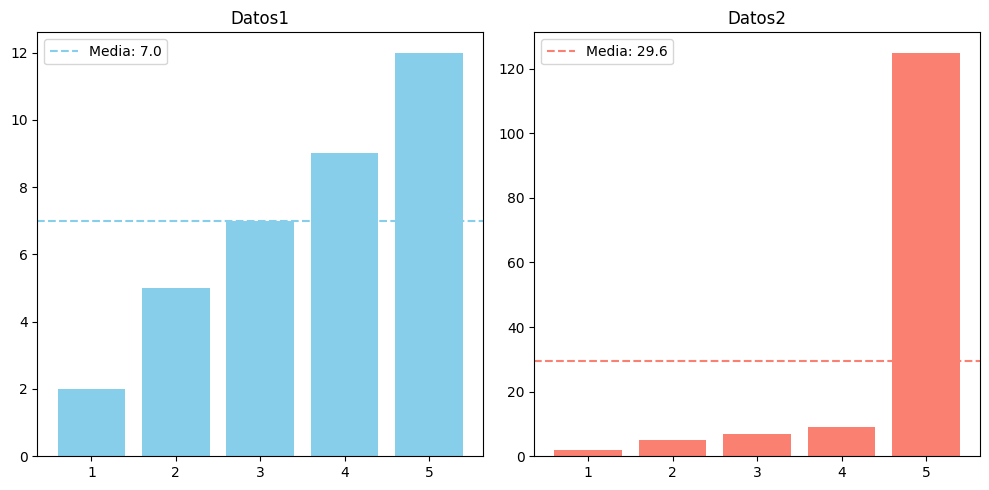

La media de los Datos 1 es 7.0

La media de los Datos 2 es 29.6


In [ ]:
# Calcular las medias de Datos1 y Datos2
media_datos1 = sum(Datos1) / len(Datos1)
media_datos2 = sum(Datos2) / len(Datos2)

# Crear la figura y los subgr√°ficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gr√°fico de barras para Datos1
axs[0].bar(range(len(Datos1)), Datos1, color='skyblue')
axs[0].axhline(y=media_datos1, color='skyblue', linestyle='--', label=f'Media: {media_datos1}')
axs[0].set_title('Datos1')
axs[0].set_xticks(range(len(Datos1)))
axs[0].set_xticklabels(range(1, len(Datos1) + 1))
axs[0].legend()

# Gr√°fico de barras para Datos2
axs[1].bar(range(len(Datos2)), Datos2, color='salmon')
axs[1].axhline(y=media_datos2, color='salmon', linestyle='--', label=f'Media: {media_datos2}')
axs[1].set_title('Datos2')
axs[1].set_xticks(range(len(Datos2)))
axs[1].set_xticklabels(range(1, len(Datos2) + 1))
axs[1].legend()

# Ajustar el espaciado entre los subgr√°ficos
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()

print(f'La media de los Datos 1 es {media_datos1}\n\nLa media de los Datos 2 es {media_datos2}')

### Media aritm√©tica: propiedades

* La suma de las desviaciones de los valores de la variable, respecto a su media aritm√©tica, es igual a cero:
$$\sum(X_{i}‚àí\bar{X})= 0 $$.

* Si transformamos los valores de la variable  a trav√©s de un cambio de origen y escala $(U=a+bX)$, la media aritm√©tica de la variable transformada es $\bar{U}= a+b\bar{X}$.

* En particular (para $b=1$) si $U=a+X$ entonces $\bar{U}= a+\bar{X}$.

    * Ejemplo. Supongamos que tenemos el peso de $N = 20$ personas $X = (59, 41, 55, 79, 61, 83, 43, 54, 89, 57, 80, 86, 67, 56, 80, 42, 60, 83, 76, 87)$.

    * Ahora, supongamos que hacemos la tranformaci√≥n $\bar{U}= a+\bar{X}$ d√≥nde $a=10$ y $b=1$, entonces $U = (69, 51, 65, 89, 71, 93, 53, 64, 99, 67, 90, 96, 77, 66, 90, 52, 70, 93, 86, 9)$

    * Entonces $\bar{U}= a+\bar{X} = 10 + \frac{\sum_{i}{X}}{20} ‚â° \frac{\sum_{i}U}{20}$
  



In [ ]:
# Generar la lista X
# X = [random.randint(40, 90) for _ in range(20)]
X = [59, 41, 55, 79, 61, 83, 43, 54, 89, 57, 80, 86, 67, 56, 80, 42, 60, 83, 76, 87]

print(f"Lista X: {X}\ny la suma de X: {sum(X)}")

a = 10
b = 1

# Generar la lista U.
U = [b*x + a for x in X]

print(f"Lista U: {U}\ny la suma de U: {sum(U)}")

x_bar= sum([i for i in X]) / len([i for i in X])


print("utilizando la conversi√≥n:\n")

print(f"La media de U = {b} X {x_bar} + {a}= {round(b*x_bar+a,1)}")

print("Calculando  la  media de U directamente:\n")

print(f"La media de U =  {sum([i for i in U]) / len([i for i in U])}")






Lista X: [59, 41, 55, 79, 61, 83, 43, 54, 89, 57, 80, 86, 67, 56, 80, 42, 60, 83, 76, 87]
y la suma de X: 1338
Lista U: [69, 51, 65, 89, 71, 93, 53, 64, 99, 67, 90, 96, 77, 66, 90, 52, 70, 93, 86, 97]
y la suma de U: 1538
utilizando la conversi√≥n:

La media de U = 1 X 66.9 + 10= 76.9
Calculando  la  media de U directamente:

La media de U =  76.9



Si dividimos todas las observaciones en $k$ grupos disjuntos, cada uno de ellos con media $\bar{x}_{i}$ y tama√±o $ùëÅ_{ùëñ}$, la media aritm√©tica de todo el conjunto se puede calcular como
$$\bar{X}=\frac{(\bar{X}_{1}N_{1}+‚Ä¶+\bar{X}_{k}N_{k})}{N}$$

## Mediana

Dada una variable $X$, su mediana, $Me(X)$, es el valor tal que es mayor que la mitad (al menos) de los casos y tambi√©n es menor o igual que (al menos) la mitad de los casos.

Para calcular la mediana buscamos el valor central en la lista de valores ordenados de $X$. Para ello, ordenamos los casos de manera que $X_{1} < X_{2} < ... < X_{N} $. Calculamos la posici√≥n central $\frac{(N+1)}{2}$:

* Si el resultado es entero (esto es, si $N$ es impar), entonces $Me(X)=X_{(N+1)/2}$.

* En otro caso (si $N$ es par): $Me(X)=\frac{(X_{(N)/2}+X_{(N+2)/2})}{2}$, esto es, el promedio de los valores en las posiciones inmediatamente anterior y posterior a $\frac{(N+1)}{2}$.

¬ø$X$ est√° reducida por intervalos? $\rightarrow$ Lo veremos m√°s adelante.


In [ ]:
def calcular_mediana(datos):
    # Ordenar los datos
    datos_ordenados = sorted(datos)
    n = len(datos_ordenados)

    # Calcular la mediana
    if n % 2 == 1:
        # Si la cantidad de datos es impar
        mediana = datos_ordenados[n // 2]
        print("n es impar")
    else:
        # Si la cantidad de datos es par

        indice_medio1 = n // 2 - 1
        indice_medio2 = n // 2

        print(f"n es par, por lo tanto:\nla posici√≥n 1 es {datos_ordenados[indice_medio1]} y la posici√≥n 2 es {datos_ordenados[indice_medio2]}")


        mediana = (datos_ordenados[indice_medio1] + datos_ordenados[indice_medio2]) / 2

    return mediana

# Ejemplo de datos
datos = df['Longitud_Texto']

# Calcular la mediana
mediana = calcular_mediana(datos)

# Imprimir la mediana
print("La mediana de la longitud de palabras de las rese√±as es:", mediana)


n es par, por lo tanto:
la posici√≥n 1 es 56 y la posici√≥n 2 es 56
La mediana de la longitud de palabras de las rese√±as es: 56.0


Otra forma de hacerlo (funci√≥n predise√±ada):

In [ ]:
#Se requiere el uso de la funci√≥n median de la librer√≠a statistics:

# Calcular la mediana
mediana2 = median(datos)

# Imprimir la mediana
print("La mediana de los datos es:", mediana2)


La mediana de los datos es: 56.0


### Mediana por intervalos:

Si la variable $X$ est√° reducida por intervalos, tomaremos como $Me(X)$ la marca de clase del **intervalo mediano**.

El intervalo mediano es el primer intervalo cuya frecuencia absoluta acumulada sea mayor o igual a $(N+1)/2$. De manera equivalente, tambi√©n podemos obtenerlo buscando el primer intervalo tal que su frecuencia absoluta relativa sea mayor o igual a $\frac{1}{2}=0.5$. Esto es, el intervalo mediano es el intervalo $i$ tal que:
$$N_{i} \geq \frac{N+1}{2}$$ y $$N_{i-1} < \frac{N+1}{2}$$

O de manera equivalente, $F_{i} \geq 0.5$ y $F_{i-1} < 0.5$.


C√≥mo ejemplo, utilizaremos un nuevo texto que contiene 218 palabras:

**Este texto que est√°s leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el n√∫mero mediano de la longitud de palabras dentro de un texto determinado. Es un ejercicio pr√°ctico que nos permite comprender c√≥mo funcionan los c√°lculos de estad√≠sticas descriptivas aplicadas al an√°lisis ling√º√≠stico.
En este contexto, la longitud de las palabras se refiere al n√∫mero de caracteres que componen cada palabra individualmente. Al analizar este texto, encontrar√°s palabras cortas, como "este", "es", "un", "de", as√≠ como palabras m√°s largas como "ilustrativo", "estad√≠sticas", "descriptivas", entre otras.
El objetivo es determinar el n√∫mero mediano de caracteres que conforman las palabras en este texto. Al calcular este valor, podemos tener una idea m√°s clara de la extensi√≥n promedio de las palabras utilizadas aqu√≠. Este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio.
Este ejercicio es √∫til en diversos contextos, desde an√°lisis de texto en ling√º√≠stica computacional hasta la elaboraci√≥n de informes y an√°lisis de contenido en campos como la investigaci√≥n acad√©mica, la publicidad y el procesamiento del lenguaje natural.
Es importante destacar que el c√°lculo del n√∫mero mediano de longitud de palabras nos brinda informaci√≥n valiosa sobre la estructura y complejidad del lenguaje utilizado, lo que puede tener implicaciones significativas en la comunicaci√≥n efectiva y la comprensi√≥n del texto.**


In [ ]:
# Ejemplo de lista de palabras
texto = """
Este texto que est√°s leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el n√∫mero mediano de la longitud de palabras dentro de un texto determinado. Es un ejercicio pr√°ctico que nos permite comprender c√≥mo funcionan los c√°lculos de estad√≠sticas descriptivas aplicadas al an√°lisis ling√º√≠stico.

En este contexto, la longitud de las palabras se refiere al n√∫mero de caracteres que componen cada palabra individualmente. Al analizar este texto, encontrar√°s palabras cortas, como "este", "es", "un", "de", as√≠ como palabras m√°s largas como "ilustrativo", "estad√≠sticas", "descriptivas", entre otras.

El objetivo es determinar el n√∫mero mediano de caracteres que conforman las palabras en este texto. Al calcular este valor, podemos tener una idea m√°s clara de la extensi√≥n promedio de las palabras utilizadas aqu√≠. Este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio.

Este ejercicio es √∫til en diversos contextos, desde an√°lisis de texto en ling√º√≠stica computacional hasta la elaboraci√≥n de informes y an√°lisis de contenido en campos como la investigaci√≥n acad√©mica, la publicidad y el procesamiento del lenguaje natural.

Es importante destacar que el c√°lculo del n√∫mero mediano de longitud de palabras nos brinda informaci√≥n valiosa sobre la estructura y complejidad del lenguaje utilizado, lo que puede tener implicaciones significativas en la comunicaci√≥n efectiva y la comprensi√≥n del texto.
"""

# Funci√≥n para limpiar el texto
def limpiar_texto(texto):
    texto_limpio = texto.lower()  # Convertir a min√∫sculas
    texto_limpio = texto_limpio.replace('√°', 'a').replace('√©', 'e').replace('√≠', 'i').replace('√≥', 'o').replace('√∫', 'u').replace('√º', 'u')  # Quitar tildes
    texto_limpio = texto_limpio.replace(',', '')  # Quitar comas
    texto_limpio = texto_limpio.replace('.', '')  # Quitar puntos
    return texto_limpio

# Limpiar el texto original
texto_limpio = limpiar_texto(texto)

print("---------")
print(f"\nTexto:\n{texto_limpio}\n")
palabras = texto_limpio.split()

longitudes = [len(palabra) for palabra in palabras]

pal_long= pd.DataFrame({
    'palabras': palabras,
    'longitudes': longitudes})
pal_long['longitudes_group'] = group_by_sturges(pal_long, 'longitudes')

N_ej3=pal_long.shape[0]
print(f"Tama√±o del conjunto de datos: {N_ej3} palabras")
display(pal_long)

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo_ej3 = pal_long['longitudes_group'].value_counts()
frecuencias_grupo_ej3 = frecuencias_grupo_ej3.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_gr_ej3 = frecuencias_grupo_ej3 / len(pal_long)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_gr_ej3 = frecuencias_grupo_ej3.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_gr_ej3 = frecuencias_acumuladas_gr_ej3 / len(pal_long)


# Calcular la marca de clase para cada intervalo
MarcaDeClase_ej3 = list(map(marca_de_clase, list(frecuencias_grupo_ej3.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_eje3 = pd.DataFrame({
    'x_i': frecuencias_grupo_ej3.index,
    'n_i': frecuencias_grupo_ej3.values,
    'f_i': frecuencias_relativas_gr_ej3.values,
    'N_i':frecuencias_acumuladas_gr_ej3.values,
    'F_i':frecuencias_relativas_acum_gr_ej3.values,
    'Marca_de_clase':MarcaDeClase_ej3
})

# Imprimir la tabla de frecuencias
print("Tabla de frecuencias:")
print("-----------------------------------------------------------------------------------------------------------")
print("Longitud   | Frecuencia   | Frecuencia Relativa | Frec. Abs. Acumulada | Frec. Rel. Acumulada | Marca de clase")
print("-----------------------------------------------------------------------------------------------------------")
for indice, fila in tabla_frecuencias_eje3.iterrows():
    # print(f'√çndice: {indice}')
    # print(f'Contenido de la fila:\n{fila}\n')

    print(f"{fila[0]:^9}    | {fila[1]:^10}| {fila[2]:.4f}              | {fila[3]:^19}  | {fila[4]:.4f}              | {fila[5]:.1f}")
print("-----------------------------------------------------------------------------------------------------------")




---------

Texto:

este texto que estas leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el numero mediano de la longitud de palabras dentro de un texto determinado es un ejercicio practico que nos permite comprender como funcionan los calculos de estadisticas descriptivas aplicadas al analisis linguistico

en este contexto la longitud de las palabras se refiere al numero de caracteres que componen cada palabra individualmente al analizar este texto encontraras palabras cortas como "este" "es" "un" "de" asi como palabras mas largas como "ilustrativo" "estadisticas" "descriptivas" entre otras

el objetivo es determinar el numero mediano de caracteres que conforman las palabras en este texto al calcular este valor podemos tener una idea mas clara de la extension promedio de las palabras utilizadas aqui este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio

este ejercicio es util en diversos contextos desde analisis de t

palabras  longitudes longitudes_group
0           este           4      [2.56-4.11)
1          texto           5      [4.11-5.67)
2            que           3      [2.56-4.11)
3          estas           5      [4.11-5.67)
4        leyendo           7      [5.67-7.22)
..           ...         ...              ...
213            y           1       [1.0-2.56)
214           la           2       [1.0-2.56)
215  comprension          11    [10.33-11.89)
216          del           3      [2.56-4.11)
217        texto           5      [4.11-5.67)

[218 rows x 3 columns]

Tabla de frecuencias:
-----------------------------------------------------------------------------------------------------------
Longitud   | Frecuencia   | Frecuencia Relativa | Frec. Abs. Acumulada | Frec. Rel. Acumulada | Marca de clase
-----------------------------------------------------------------------------------------------------------
[1.0-2.56)    |     56    | 0.2569              |         56           | 0.2569              | 1.8
[2.56-4.11)    |     43    | 0.1972              |         99           | 0.4541              | 3.3
[4.11-5.67)    |     24    | 0.1101              |         123          | 0.5642              | 4.9
[5.67-7.22)    |     25    | 0.1147              |         148          | 0.6789              | 6.4
[7.22-8.78)    |     29    | 0.1330              |         177          | 0.8119              | 8.0
[8.78-10.33)    |     20    | 0.0917              |         197          | 0.9037              | 9.6
[10.33-11.89)    |     9     | 0.0413              

In [ ]:
# @title Rta ej3: { vertical-output: true }
pto = (N_ej3+1)/2
print(f"Intervalo mediano: {pto}")

mediana=round(tabla_frecuencias_eje3.loc[(tabla_frecuencias_eje3['N_i'] >= pto).idxmax(),"Marca_de_clase"])
print(f"La mediana de longitud de palabras del texto de prueba es: {mediana}")

# median(longitudes)#para corroborar los datos se puede calcular la mediana de los datos sin agrupar en intervalos



Intervalo mediano: 109.5
La mediana de longitud de palabras del texto de prueba es: 5


### Mediana pros y contras:

### Pros:

- **Robustez ante valores extremos:** La mediana no es sensible a los valores extremos o at√≠picos en los datos. Esto significa que un valor extremo no afecta significativamente la mediana, lo que la hace √∫til cuando los datos contienen valores at√≠picos que, c√≥mo dijimos antes, podr√≠an distorsionar la media.
   
- **Apropiada para datos ordinales o intervalos:** La mediana es √∫til cuando se trabaja con datos ordinales o de intervalos, donde el orden de los valores es importante, pero no necesariamente su magnitud exacta.

- **Interpretaci√≥n sencilla:** Es f√°cil de entender y calcular. Consiste en el valor que divide a la muestra ordenada en dos partes iguales, de modo que la mitad de los valores est√°n por encima y la otra mitad por debajo.

### Contras:

- **Menos sensible a la distribuci√≥n de los datos:** La mediana no utiliza toda la informaci√≥n en los datos y, por lo tanto, puede ser menos sensible que la media para detectar patrones o cambios en la distribuci√≥n de los datos.





In [ ]:
display(Datos)

Datos1  Datos2
0       2       2
1       5       5
2       7       7
3       9       9
4      12     125

## Moda:
La moda es (son) el (los) valor(es) de frecuencia m√°xima. Puede haber m√°s de una moda. La denotamos como $Mo(X)$.

Ejemplo. Para la variable $X =(4, 7, 5, 7, 5, 4, 2, 7)$, tenemos $Mo(X)=7$, que es el valor con mayor frecuencia absoluta.

Se suele considerar una medida de posici√≥n central, pero no tiene porqu√© comportarse como tal. Por ejemplo:
En el ejemplo anterior $Mo(X)= max(X)$.
Para la variable $X=(4, 7, 4, 7, 5, 4, 5, 7)$, tenemos $Mo(X)={4,7}$, que son los valores m√≠nimo y m√°ximo de X.

Si nos dan $X$ reducida por intervalos, todo aquel intervalo con densidad de frecuencia m√°xima es intervalo modal (aquellos con altura m√°xima en el histograma). Reportaremos la moda como la(s) marca(s) de clase de el (los) intervalo(s) modal(es) como $Mo(X)$.

***Ejemplo:*** Continuando con el ejemplo anterior, del texto que hemos generado, calcularemos la moda de los datos, tanto sin agrupar, como agrupados:

Longitudes sin agrupar en intervalos:

1      6
2     50
3     22
4     21
5     24
6     10
7     15
8     29
9     11
10     9
11     9
12     3
13     5
14     3
15     1
Name: longitudes, dtype: int64


<Axes: >

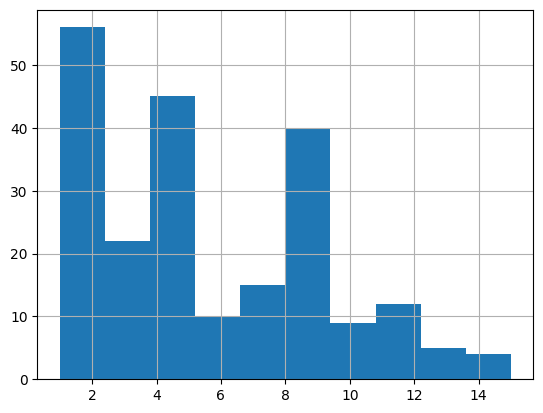

In [ ]:
# Calcular la tabla de frecuencias de la columna 'Grupo'
freq_longitudes = pal_long['longitudes'].value_counts()
freq_longitudes = freq_longitudes.sort_index()
print(freq_longitudes)
pal_long['longitudes'].hist()

Longitudes agrupadas por intervalos:

In [ ]:
tabla_frecuencias_eje3

x_i  n_i       f_i  N_i       F_i  Marca_de_clase
0     [1.0-2.56)   56  0.256881   56  0.256881           1.780
1    [2.56-4.11)   43  0.197248   99  0.454128           3.335
2    [4.11-5.67)   24  0.110092  123  0.564220           4.890
3    [5.67-7.22)   25  0.114679  148  0.678899           6.445
4    [7.22-8.78)   29  0.133028  177  0.811927           8.000
5   [8.78-10.33)   20  0.091743  197  0.903670           9.555
6  [10.33-11.89)    9  0.041284  206  0.944954          11.110
7  [11.89-13.44)    8  0.036697  214  0.981651          12.665
8  [13.44-15.01)    4  0.018349  218  1.000000          14.225

### Moda pros y contras:

### Pros:
- Es muy f√°cil de calcular, sobre todo para variables descritas por las frecuencias de sus valores, ya que consiste en identificar el (los) valor(es) con frecuencia m√°xima. Si la variable est√° reducida por intervalos de igual amplitud, podremos obtener la moda de esta manera.

### Contras:
- Realmente no es una medida de posici√≥n central. Sin embargo, para variables unimodales y con cierta simetr√≠a (esta caracter√≠stica se puede apreciar en el gr√°fico de barras de frecuencias o en el histograma), s√≠ que representa una centralidad.
- Cuando los valores de la variable no se repiten, no tiene sentido (no nos da ninguna informaci√≥n) ya que todos los valores son modas.
Ejemplo: para la distribuci√≥n $X=(2, 5, 7, 9, 12)$ todos los valores son moda.


## Cuantiles:

Las ***medidas de posici√≥n no central*** m√°s conocidas son los cuantiles, que podemos ver como una generalizaci√≥n de la mediana:

La *mediana* es el cuantil de orden 2: separa los valores ordenados en dos bloques iguales en n√∫mero de casos.

Los cuartiles $Q_{1}$, $Q_{2}$ y $Q_{3}$son los cuantiles de orden 4: separan los valores ordenados en cuatro bloques iguales en n√∫mero de casos.

Los percentiles $P_{1}$, $P_{2}$, ..., $P_{99}$ son los de orden 100, y separan los valores ordenados en 100 bloques iguales en n√∫mero de casos.

Los deciles $D_{1}$, $D_{2}$, ..., $D_{9}$ son los de orden 10.

Otros cuantiles menos habituales: los terciles (orden 3), los quintiles (orden 5) ‚Ä¶


## ¬øC√≥mo se calculan?:

Ordenamos los datos: $X_{1} \leq X_{1} \leq ... \leq X_{N}$.

Para el orden $q$ se definen $q-1$ cuantiles de n√∫mero $r=1, 2, ..., q-1$.

El ùëü-√©simo cuantil de orden $q$ es el valor que ocupa la posici√≥n $\frac{r}{q}(N+1)$:
- si el resultado de la posici√≥n es entero, reportamos el valor de esa posici√≥n, $X_{i}$ tal que $$i=\frac{r}{q}(N+1)$$
- en otro caso, reportamos la media aritm√©tica de los valores que ocupan las posiciones inmediatamente anterior y posterior a la posici√≥n obtenida, esto es, $$\frac{X_{i}+X_{i+1}}{2}$$
tal que $i < \frac{r}{q}(N+1) < i+1$.

**Observaci√≥n**. Muchos cuantiles de distintos ordenes coinciden, por ejemplo:
$Q_{1} = P_{2}$ (la cuarta parte es el 25%);

$Q_{2} = Me = P_{50}$ (2/4=1/2=50/100);

$Q_{3} = P_{75}$ (3/4=75/100).


### Cuantiles: Ejercicio:
Calcular los cuantiles

El objetivo de este ejercicio es calcular los diferentes cuantiles de la longitud de las palabras del texto:

***Texto:***

**Este texto que est√°s leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el n√∫mero mediano de la longitud de palabras dentro de un texto determinado. Es un ejercicio pr√°ctico que nos permite comprender c√≥mo funcionan los c√°lculos de estad√≠sticas descriptivas aplicadas al an√°lisis ling√º√≠stico.
En este contexto, la longitud de las palabras se refiere al n√∫mero de caracteres que componen cada palabra individualmente. Al analizar este texto, encontrar√°s palabras cortas, como "este", "es", "un", "de", as√≠ como palabras m√°s largas como "ilustrativo", "estad√≠sticas", "descriptivas", entre otras.
El objetivo es determinar el n√∫mero mediano de caracteres que conforman las palabras en este texto. Al calcular este valor, podemos tener una idea m√°s clara de la extensi√≥n promedio de las palabras utilizadas aqu√≠. Este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio.
Este ejercicio es √∫til en diversos contextos, desde an√°lisis de texto en ling√º√≠stica computacional hasta la elaboraci√≥n de informes y an√°lisis de contenido en campos como la investigaci√≥n acad√©mica, la publicidad y el procesamiento del lenguaje natural.
Es importante destacar que el c√°lculo del n√∫mero mediano de longitud de palabras nos brinda informaci√≥n valiosa sobre la estructura y complejidad del lenguaje utilizado, lo que puede tener implicaciones significativas en la comunicaci√≥n efectiva y la comprensi√≥n del texto.**


Recordemos que en el ejercicio anterior limpiamos el texto, por lo que utilizaremos la variable creada **texto_limpio**.
Calcularemos los valores que dividen la distribuci√≥n de la longitud de las palabras, primero en 4 partes iguales, es decir los cuartiles, y luego en 10 partes iguales, es decir, los deciles.

Cuartiles:

In [ ]:
try:
    pal_long = pal_long.sort_values(by="longitudes").reset_index()
except:
    pass
display(pal_long[['longitudes']])
print("------------------------------------------------------------\n------------------------------------------------------------\n")
#por ejemplo los cuartiles:
q=4 #entonces q-1 grupos
#para q1:
print("------------------------------------------------------------\nPara los cuartiles\n------------------------------------------------------------\n")
for r in range(1,q):
    N_1=N_ej3+1
    i=round((r/q)*N_1,2)
    print(f"La posici√≥n i es: {i}")
print("------------------------------------------------------------\nPara los deciles\n------------------------------------------------------------\n")
#por ejemplo los deciles:
q=10 #entonces q-1 grupos
#para q1:
for r in range(1,q):
    N_1=N_ej3+1
    i=round((r/q)*N_1,2)
    print(f"La posici√≥n i es: {i}")




longitudes
0             1
1             1
2             1
3             1
4             1
..          ...
213          13
214          14
215          14
216          14
217          15

[218 rows x 1 columns]

------------------------------------------------------------
------------------------------------------------------------

------------------------------------------------------------
Para los cuartiles
------------------------------------------------------------

La posici√≥n i es: 54.75
La posici√≥n i es: 109.5
La posici√≥n i es: 164.25
------------------------------------------------------------
Para los deciles
------------------------------------------------------------

La posici√≥n i es: 21.9
La posici√≥n i es: 43.8
La posici√≥n i es: 65.7
La posici√≥n i es: 87.6
La posici√≥n i es: 109.5
La posici√≥n i es: 131.4
La posici√≥n i es: 153.3
La posici√≥n i es: 175.2
La posici√≥n i es: 197.1


In [ ]:
# Calculamos los cuantiles: cuartiles
cuantiles = [0.25, 0.50, 0.75]
resultados_cuantiles = pal_long['longitudes'].quantile(cuantiles)

# Mostramos los resultados
print("\nCuartiles:")
print(resultados_cuantiles)


Cuartiles:
0.25    2.0
0.50    5.0
0.75    8.0
Name: longitudes, dtype: float64


In [ ]:
deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
resultados_deciles = pal_long['longitudes'].quantile(deciles)

# Mostramos los resultados
print("Deciles:")
print(resultados_deciles)

Deciles:
0.1     2.0
0.2     2.0
0.3     3.0
0.4     4.0
0.5     5.0
0.6     6.0
0.7     8.0
0.8     8.0
0.9    10.0
Name: longitudes, dtype: float64


### Cuartiles para una variable por intervalo
Si la variable $X$ est√° reducida por intervalos, tomaremos como cuantil r-√©simo de orden $q$ la marca de clase del primer intervalo tal que su frecuencia absoluta acumulada sea mayor o igual a $\frac{r}{q}(N+1)$.
De manera equivalente, tambi√©n podemos obtenerlo buscando el primer intervalo tal que su frecuencia absoluta relativa sea mayor o igual a $\frac{r}{q}$.
Esto es, el intervalo $i$ tal que:

$$N_{i} \geq \frac{r}{q}(N+1)$$
y
$$N_{i-1} < \frac{r}{q}(N+1)$$

O de manera equivalente, $F_{i} \geq \frac{r}{q} $ y $F_{i-1} < \frac{r}{q} $



### Cuantiles: Ejercicio:
Calcular los cuantiles de datos agrupados por intervalos:

El objetivo de este ejercicio es calcular los diferentes cuantiles de la longitud de las palabras del texto que est√° por agregada por intervalos (ver tabla *tabla_frecuencias_eje3*)


In [ ]:
print(tabla_frecuencias_eje3)


             x_i  n_i       f_i  N_i       F_i  Marca_de_clase
0     [1.0-2.56)   56  0.256881   56  0.256881           1.780
1    [2.56-4.11)   43  0.197248   99  0.454128           3.335
2    [4.11-5.67)   24  0.110092  123  0.564220           4.890
3    [5.67-7.22)   25  0.114679  148  0.678899           6.445
4    [7.22-8.78)   29  0.133028  177  0.811927           8.000
5   [8.78-10.33)   20  0.091743  197  0.903670           9.555
6  [10.33-11.89)    9  0.041284  206  0.944954          11.110
7  [11.89-13.44)    8  0.036697  214  0.981651          12.665
8  [13.44-15.01)    4  0.018349  218  1.000000          14.225


In [ ]:
# @title Rta cuantiles por intervalos: { vertical-output: true }
#cuartiles:
print(f"\nLos cuartiles de los datos agrupados por intervalos son:\n")
q=4
for i in range(1,q):
    pto=i/q
    # print(pto)
    q_i=round(tabla_frecuencias_eje3.loc[(tabla_frecuencias_eje3['F_i'] >= pto).idxmax(),"Marca_de_clase"])
    print(f"El cuartil {i} de longitud de palabras del texto de prueba es: {q_i}")


print(f"\nLos Deciles de los datos agrupados por intervalos son:\n")
q=10
for i in range(1,q):
    pto=i/q
    # print(pto)
    q_i=round(tabla_frecuencias_eje3.loc[(tabla_frecuencias_eje3['F_i'] >= pto).idxmax(),"Marca_de_clase"])
    print(f"El decil {i} de longitud de palabras del texto de prueba es: {q_i}")






Los cuartiles de los datos agrupados por intervalos son:

El cuartil 1 de longitud de palabras del texto de prueba es: 2
El cuartil 2 de longitud de palabras del texto de prueba es: 5
El cuartil 3 de longitud de palabras del texto de prueba es: 8

Los Deciles de los datos agrupados por intervalos son:

El decil 1 de longitud de palabras del texto de prueba es: 2
El decil 2 de longitud de palabras del texto de prueba es: 2
El decil 3 de longitud de palabras del texto de prueba es: 3
El decil 4 de longitud de palabras del texto de prueba es: 3
El decil 5 de longitud de palabras del texto de prueba es: 5
El decil 6 de longitud de palabras del texto de prueba es: 6
El decil 7 de longitud de palabras del texto de prueba es: 8
El decil 8 de longitud de palabras del texto de prueba es: 8
El decil 9 de longitud de palabras del texto de prueba es: 10


## Medidas de dispersi√≥n:

Cuantifican cu√°nto ***var√≠a*** la variable de estudio (c√≥mo los valores se distinguen de sus valores centrales).

* **Desviaci√≥n t√≠pica**:
Geom√©tricamente, la **desviaci√≥n t√≠pica** mide lo lejos que est√° la variable de ser constante, en concreto de tomar siempre el valor $\bar{X}$:

$$\sigma_{X}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(X_{i}-\mu_{X})^{2}}$$

* **Varianza**:
Es definida como el cuadrado de la desviaci√≥n t√≠pica.
$$Var(X) = \sigma_{X}^{2}=\frac{1}{N}\sum_{i=1}^{N}(X_{i}-\mu_{X})^{2}$$

donde $N$ es el tama√±o de la poblaci√≥n y $\mu_{X}$ es conocida como la media poblacional.


### ¬øC√≥mo se calcula la varianza?

Las siguientes expresiones son equivalentes para calcular la varianza, que dependiendo de la informaci√≥n de la que dispongamos nos pueden facilitar su c√°lculo. Esto nos permite definir la varianza como la diferencia de la media de los cuadrados con respecto al cuadrado de la media:


$$Var(X) = \sigma_{X}^{2}=\frac{1}{N} \sum_{i=1}^{N}(x_{i}-\mu_{X})^{2} = \frac{1}{N}\sum_{i=1}^{N}X_{i}^{2}-\mu_{X}^{2} = \bar{X^{2}}-\mu_{X}^{2} = \frac{1}{N}\Big(\sum_{i=1}^{N}X_{i}^{2}-\frac{(\sum_{i=1}^{N}X_{i})^{2}}{N}\Big)$$

La √∫ltima expresi√≥n es la m√°s recomendable para realizar las cuentas manualmente: requiere la suma y la suma de cuadrados.

Si $X$ est√° reducida por intervalos entonces se aproximan $\sigma_{X}$ y $\sigma_{X}^{2}$ usando las marcas de clase, como en el caso de la media $\bar{X}$.








### Ejemplo:

Ejercicio de c√°lculo de varianza y desviaci√≥n t√≠pica:

El prop√≥sito de este ejercicio es calcular la varianza y la desviaci√≥n est√°ndar de la longitud de las palabras del texto dado. Utilizaremos el mismo texto de ejemplo de los ejercicios anteriores y realizaremos los c√°lculos paso a paso.


In [ ]:
display(pal_long[['longitudes']])

# Calculamos la media
media = sum(longitudes) / len(longitudes)
print("Media:", media)

# Calculamos la suma de los cuadrados de las diferencias
suma_cuadrados_diferencias = sum((x - media) ** 2 for x in longitudes)
print("Suma de los cuadrados de las diferencias:", suma_cuadrados_diferencias)

# Calculamos la varianza
varianza = suma_cuadrados_diferencias / len(longitudes)
print("Varianza:", varianza)

# Calculamos la desviaci√≥n est√°ndar
desviacion_estandar = varianza ** 0.5
print("Desviaci√≥n est√°ndar:", desviacion_estandar)





longitudes
0             1
1             1
2             1
3             1
4             1
..          ...
213          13
214          14
215          14
216          14
217          15

[218 rows x 1 columns]

Media: 5.591743119266055
Suma de los cuadrados de las diferencias: 2444.665137614679
Varianza: 11.21406026428752
Desviaci√≥n est√°ndar: 3.3487401010361375


C√°lculo a trav√©s de funciones de Python (dentro de la librer√≠a Numpy):


In [ ]:
# Calculamos la varianza y la desviaci√≥n t√≠pica con numpy
varianza_np = np.var(longitudes)
desviacion_estandar_np = np.std(longitudes)

print("Varianza (con numpy):", round(varianza_np,2))
print("Desviaci√≥n est√°ndar (con numpy):", round(desviacion_estandar_np,2))

Varianza (con numpy): 11.21
Desviaci√≥n est√°ndar (con numpy): 3.35


### Propiedades de la desviaci√≥n t√≠pica y la varianza:

Propiedades de la Varianza:

* La varianza es una medida no negativa, es decir, $\sigma^{2}_{X} \geq 0$ para cualquier variable aleatoria $X$.
    
* La varianza es cero si y solo si todos los valores de la variable aleatoria son iguales, es decir, $\sigma_{X}^{2} = 0 \iff X = c$ para alg√∫n $c \in \mathbb{R}$.
    
* La varianza de una constante multiplicada por una variable aleatoria es igual a la constante al cuadrado multiplicada por la varianza de la variable aleatoria, es decir, $\sigma_{cX}^{2} =  c^{2}\sigma^{2}_{X}$.
    
* La varianza de la suma de dos variables aleatorias independientes es igual a la suma de sus varianzas, es decir, $\sigma^{2}_{X + Y} = \sigma^{2}_{X} + \sigma^{2}_{Y}$ para variables aleatorias $X$ e $Y$ independientes.


Propiedades de la Desviaci√≥n T√≠pica:
    
* Al igual que la varianza, la desviaci√≥n t√≠pica es una medida no negativa, es decir, $\sigma_{X} \geq 0$.
    
* La desviaci√≥n t√≠pica mide la dispersi√≥n de los datos alrededor de la media de la misma manera que la varianza, pero est√° en la misma escala que los datos originales, lo que facilita su interpretaci√≥n.
    
* Las propiedades de la desviaci√≥n t√≠pica son esencialmente las mismas que las de la varianza, ya que la desviaci√≥n t√≠pica es simplemente la ra√≠z cuadrada de la varianza.

***Ejemplo:***

Supongamos que tenemos una variable aleatoria $X$ cuyos valores son $1, 2, 3$ con igual probabilidad. Queremos calcular la varianza de $2X$.


Primero, calculemos la media de $X$:
$$
\bar{X} = \frac{1+2+3}{3} = 2.
$$

La varianza de $X$ es:
$$
Var(X) = E[(X - \mu_{X})^2] = \frac{(1-2)^2 + (2-2)^2 + (3-2)^2}{3} = \frac{2}{3}.
$$

Aplicando la propiedad, obtenemos:
$$
Var(2X) = 2^2 \cdot Var(X) = 4 \cdot \frac{2}{3} = \frac{8}{3}.
$$




C√°lculo de la cuasivarianza y la cuasidesviaci√≥n t√≠pica v√≠a funci√≥n de Python :

In [ ]:
# Calculamos la cuasi varianza y la cuasi desviaci√≥n t√≠pica con numpy
varianza_np = np.var(longitudes, ddof=1) #con ddof=1 es para ajustar el divisor a n-1
desviacion_estandar_np = np.std(longitudes, ddof=1)

print("Varianza (con numpy):", round(varianza_np,2))
print("Desviaci√≥n est√°ndar (con numpy):", round(desviacion_estandar_np,2))


Varianza (con numpy): 11.27
Desviaci√≥n est√°ndar (con numpy): 3.36


### Cuasivarianza y cuasidesviaci√≥n t√≠pica

La cuasivarianza y la cuasidesviaci√≥n t√≠pica se definen de manera muy similar a la sus versiones *plenas*. La √∫nica diferencia es que, en este caso, se divide por $n-1$, donde $n$ es el tama√±o de la mustra.

$$S_{X}=\sqrt{\frac{1}{(n-1)}\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}}$$
$$Var(X) = S_{X}^{2}=\frac{1}{(n-1)}\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}$$,
donde $\bar{X}$ es la media estimada en la muestra.

- Las propiedades son las mismas que en el caso de la varianza y la desviaci√≥n t√≠pica.
<!-- <font color='red'>bar</font> -->

## Medidas de dispersi√≥n absolutas y relativas:

La (cuasi)varianza y la (cuasi)desviaci√≥n t√≠pica son **medidas de dispersi√≥n absoluta**.

La medida de dispersi√≥n absoluta m√°s b√°sica es el **recorrido** o **rango**:
$$Re(X) = \max(X)-\min(X)$$

Para comparar la dispersi√≥n en dos variables, o en dos grupos dentro de una variable, no es suficiente conocer la dispersi√≥n absoluta. Por ejemplo, una varianza igual a 4 es enorme si la variable es el n√∫mero de hijos de los propietarios de una comunidad de vecinos, pero es peque√±√≠sima si la variable es la poblaci√≥n de los municipios de una regi√≥n.

Para ello, y para tener una medida de la dispersi√≥n que no se vea afectada por cambios de escala, se definen las **medidas de dispersi√≥n relativas**.

El recorrido relativo es la medida relativizada del recorrido:
$$Rr(X) = \frac{Re(X)}{|\bar{X}|}$$


In [ ]:
longitud_minima = min(longitudes)
longitud_maxima = max(longitudes)
rango = longitud_maxima-longitud_minima
recorrido = round(abs(rango/np.mean(longitudes)),2)
print(f"La longitud m√≠nima es {longitud_minima} y la m√°xima es {longitud_maxima}\nel rango es {rango} y el recorrido es {recorrido}")

La longitud m√≠nima es 1 y la m√°xima es 15
el rango es 14 y el recorrido es 2.5


## Coeficiente de variaci√≥n de Pearson

El coeficiente de variaci√≥n (de Pearson) es la medida de dispersi√≥n relativa m√°s importante, una medida relativizada de la desviaci√≥n t√≠pica:
$$CV(X) = \frac{S_{X}}{\bar{X}}*100$$

El coeficiente de variaci√≥n de Pearson (CV) es una medida de variabilidad relativa que se utiliza para comparar la dispersi√≥n de diferentes conjuntos de datos en t√©rminos de su desviaci√≥n est√°ndar y su media. A continuaci√≥n, se presentan algunas propiedades importantes del coeficiente de variaci√≥n de Pearson:

* El coeficiente de variaci√≥n de Pearson es adimensional, lo que significa que es independiente de la escala de los datos. Esto hace que sea una medida √∫til para comparar la variabilidad relativa de diferentes conjuntos de datos, incluso si tienen diferentes unidades o escalas de medici√≥n.
    
* El coeficiente de variaci√≥n de Pearson se expresa como un porcentaje, lo que facilita su interpretaci√≥n. Cuanto mayor sea el valor del coeficiente de variaci√≥n, mayor ser√° la dispersi√≥n de los datos en relaci√≥n con su media, y viceversa.
    
* El coeficiente de variaci√≥n de Pearson es sensible a los cambios en la escala de los datos. Esto significa que si los datos se escalan por un factor constante, el coeficiente de variaci√≥n tambi√©n cambiar√° en consecuencia.
    
* El coeficiente de variaci√≥n de Pearson es √∫til para comparar la dispersi√≥n de diferentes conjuntos de datos, pero puede no ser apropiado para conjuntos de datos con media cercana a cero, ya que el coeficiente de variaci√≥n puede volverse indefinido o extremadamente grande en tales casos.


**Nota**. La unidad de la varianza es la de la variable elevada al cuadrado, la de la desviaci√≥n t√≠pica es la de la propia variable, mientras que para las medidas de dispersi√≥n relativas desaparece la unidad.




## Valores tipificados:

La tipificaci√≥n de una variable es un proceso estad√≠stico que transforma los datos originales en una nueva escala, generalmente con una media de 0 y una desviaci√≥n est√°ndar de 1. Esto se logra restando la media de los datos originales y dividiendo por la desviaci√≥n t√≠pica. La variable resultante se conoce como variable tipificada.

Matem√°ticamente, la tipificaci√≥n de una variable \(X\) se define como:

$$
X_{\text{tip}} = \frac{X - \mu}{\sigma}
$$

Donde:
* $(X_{\text{tip}})$ es la variable tipificada.
* $(X)$ es la variable original.
* $(\mu)$ es la media de la variable original.
* $(\sigma)$ es la desviaci√≥n est√°ndar de la variable original.

La tipificaci√≥n es √∫til para comparar diferentes conjuntos de datos que pueden tener diferentes escalas y unidades de medida. Tambi√©n puede simplificar el an√°lisis estad√≠stico al centrar los datos alrededor de cero y estandarizar su dispersi√≥n.

### Ejemplo de Aplicaci√≥n

Consideremos el ejemplo de la longitud de las palabras dentro del texto que hemos estado trabajando:


Longitudes de las palabras: $\{4, 2, 2, 7, 2, 5, 3, 9, 8, 2, 8, 3, 7\}$

Calculemos la variable tipificada para estas longitudes. Primero, calculamos la media y la desviaci√≥n est√°ndar de las longitudes de las palabras.

Media $\mu$:  $\frac{1}{13} \sum_{i=1}^{13} x_i $

Desviaci√≥n est√°ndar $\sigma:(\sqrt{\frac{1}{13} \sum_{i=1}^{13} (x_i - \mu)^2})$

Luego, tipificamos cada longitud de palabra utilizando la f√≥rmula anterior.

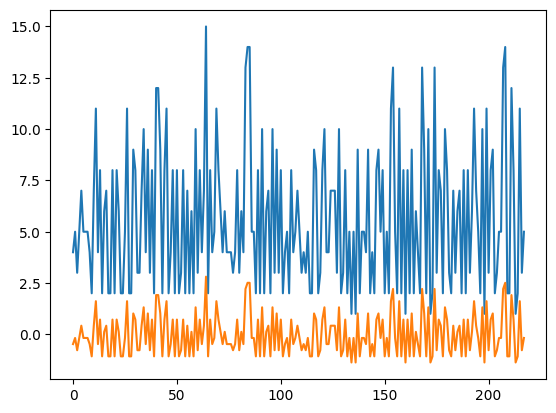

In [ ]:
# Calcular la media y la desviaci√≥n t√≠pica
media = np.mean(longitudes)
desviacion_estandar = np.std(longitudes)

# Tipificar los datos
datos_tipificados = [(x - media) / desviacion_estandar for x in longitudes]

# print("Datos originales:", longitudes)
# print("Datos tipificados:", datos_tipificados)

plt.plot(longitudes)
plt.plot(datos_tipificados)

## Razones:

La raz√≥n es una cantidad que compara mediante cociente el n√∫mero de casos de una categor√≠a con respecto al n√∫mero de casos de otra categor√≠a, por lo tanto, para obtener la raz√≥n de dos categor√≠as, por ejemplo la 1 y la 2, tenemos:
$$\text{raz√≥n}=\frac{(\# categor√≠a 1)}{(\# categor√≠a 2)}$$

Es habitual expresar las razones en porcentaje, esto es, por cada 100 unidades (de la categor√≠a referencia, en nuestro caso la categor√≠a 2):
$$\text{raz√≥n}\times 100\%=\frac{(\# categor√≠a 1)}{(\# categor√≠a 2)}\times 100\%$$


**Consideremos el texto del ejemplo anterior.**

Para calcular la raz√≥n de la longitud de las palabras en este texto, primero necesitamos calcular la longitud de cada palabra. Luego, podemos determinar la raz√≥n entre la longitud de cada palabra y la longitud total de todas las palabras en el texto.

**C√°lculo de la Raz√≥n de la Longitud de las Palabras**

Raz√≥n de la longitud de las palabras:
$$
\begin{align*}
\text{Raz√≥n} &= \frac{\text{Longitud de cada palabra}}{\text{Longitud total de todas las palabras}}
\end{align*}
$$

Los valores de la variable *razon_longitudes* que se obtiene a continuaci√≥n, representan la proporci√≥n de la longitud de cada palabra con respecto a la longitud total de todas las palabras en el texto.


In [ ]:
# Calcular la longitud total de todas las palabras
longitud_total = sum(longitudes)

# Calcular la raz√≥n de la longitud de las palabras
razon_longitudes = [longitud / longitud_total for longitud in longitudes]

# Imprimir los resultados
print("Longitudes de las palabras:", longitudes)
print("Longitud total de todas las palabras:", longitud_total)
print("Raz√≥n de la longitud de las palabras:", razon_longitudes)


Longitudes de las palabras: [4, 5, 3, 5, 7, 5, 5, 5, 4, 2, 7, 11, 4, 8, 2, 6, 7, 2, 2, 8, 2, 8, 6, 2, 2, 5, 11, 2, 2, 9, 8, 3, 3, 7, 10, 4, 9, 3, 8, 2, 12, 12, 9, 2, 8, 11, 2, 4, 8, 2, 8, 2, 3, 8, 2, 7, 2, 6, 2, 10, 3, 8, 4, 7, 15, 2, 8, 4, 5, 11, 8, 6, 4, 6, 4, 4, 4, 3, 4, 8, 3, 6, 4, 13, 14, 14, 5, 5, 2, 8, 2, 10, 2, 6, 7, 2, 10, 3, 9, 3, 8, 2, 4, 5, 2, 8, 4, 5, 7, 5, 3, 4, 3, 5, 2, 2, 9, 8, 2, 3, 8, 10, 4, 4, 7, 7, 7, 3, 10, 2, 3, 8, 2, 5, 1, 5, 1, 9, 2, 5, 5, 4, 9, 2, 4, 2, 8, 9, 5, 8, 2, 5, 2, 11, 13, 5, 2, 11, 2, 8, 1, 8, 2, 9, 2, 6, 4, 2, 13, 9, 2, 10, 1, 2, 13, 3, 8, 7, 2, 10, 8, 3, 2, 7, 3, 6, 7, 2, 8, 2, 8, 3, 6, 11, 7, 5, 2, 10, 1, 11, 3, 8, 9, 2, 3, 5, 5, 13, 14, 2, 2, 12, 8, 1, 2, 11, 3, 5]
Longitud total de todas las palabras: 1219
Raz√≥n de la longitud de las palabras: [0.003281378178835111, 0.004101722723543888, 0.002461033634126333, 0.004101722723543888, 0.005742411812961444, 0.004101722723543888, 0.004101722723543888, 0.004101722723543888, 0.003281378178835111, 0.0016

## Tasas:

La tasa es una medida que expresa la relaci√≥n entre dos cantidades. En el contexto de la estad√≠stica y la probabilidad, la tasa se define como el n√∫mero de eventos favorables dividido por el n√∫mero total de eventos potenciales.

Matem√°ticamente, la tasa se expresa como:

$$\text{Tasa} = \frac{\text{# de Favorables}}{\text{# de Potenciales}} $$

Las tasas son √∫tiles para comparar la ocurrencia de eventos en diferentes situaciones y proporcionan una medida relativa de la probabilidad de que ocurra un evento en relaci√≥n con el total de eventos posibles.

**Propiedades de las Tasas**

Algunas propiedades importantes de las tasas incluyen:

* Las tasas son adimensionales, lo que significa que no tienen unidades de medida.
* Las tasas pueden ser expresadas como fracciones, decimales o porcentajes, dependiendo de la conveniencia y el contexto.
* Las tasas pueden compararse entre diferentes poblaciones o situaciones para evaluar la probabilidad relativa de ocurrencia de un evento.


### Ejemplo de Aplicaci√≥n de Tasas

Consideremos el mismo texto de los ejemplos anteriores:

Para calcular la tasa de aparici√≥n de la letra 'e' en este texto, primero necesitamos contar el n√∫mero total de letras 'e' y dividirlo por el n√∫mero total de letras en el texto.

**C√°lculo de la Tasa de Aparici√≥n de la Letra e:**



In [ ]:
# Contar el n√∫mero total de letras
numero_total_letras = len(texto_limpio)

# Contar el n√∫mero de letras 'e'
numero_letras_e = texto_limpio.count('e')

# Calcular la tasa de aparici√≥n de la letra 'e'
tasa_aparicion_e = numero_letras_e / numero_total_letras

# Imprimir los resultados
print("N√∫mero total de letras:", numero_total_letras)
print("N√∫mero de letras 'e':", numero_letras_e)
print("Tasa de aparici√≥n de la letra 'e':", tasa_aparicion_e)

N√∫mero total de letras: 1442
N√∫mero de letras 'e': 153
Tasa de aparici√≥n de la letra 'e': 0.10610263522884882


## N√∫meros √çndices Simples

Los n√∫meros √≠ndices simples son una herramienta estad√≠stica utilizada para comparar una magnitud en dos situaciones, una de las cuales se considera como referencia o base. Se utilizan para medir los cambios relativos en una variable a lo largo del tiempo o en diferentes condiciones.

Matem√°ticamente, un n√∫mero √≠ndice simple se calcula como:

$$\text{√çndice} = \left( \frac{\text{Valor Actual}}{\text{Valor de Referencia}} \right) \times 100 $$

Los n√∫meros √≠ndices simples se expresan generalmente como porcentajes y proporcionan una medida relativa del cambio en una variable con respecto a un valor base.

**Propiedades de los N√∫meros √çndices Simples**

Algunas propiedades importantes de los n√∫meros √≠ndices simples incluyen:


* Los n√∫meros √≠ndices simples son adimensionales y se expresan como porcentajes.
* Los n√∫meros √≠ndices simples pueden ser utilizados para comparar cualquier tipo de variable, como precios, cantidades, √≠ndices de producci√≥n, entre otros.
* Los n√∫meros √≠ndices simples son √∫tiles para resaltar los cambios relativos en una variable a lo largo del tiempo o en diferentes situaciones.


### Ejemplo de Aplicaci√≥n de N√∫meros √çndices Simples

Consideremos el texto de los ejemplos anteriores:

Supongamos que queremos calcular un √≠ndice simple de la longitud de las palabras en este texto, compar√°ndolo con un valor de referencia de longitud promedio de palabras en un texto est√°ndar.

**C√°lculo del √çndice Simple de la Longitud de las Palabras:**



In [ ]:
# @title
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Calcular las longitudes de las palabras
longitudes = [len(palabra) for palabra in palabras]

# Calcular la longitud promedio de las palabras en el texto
longitud_promedio = sum(longitudes) / len(longitudes)

# Valor de referencia de longitud promedio de palabras en un texto est√°ndar
valor_referencia = 5

# Calcular el √≠ndice simple de la longitud de las palabras
indice_simple = (longitud_promedio / valor_referencia) * 100

# Imprimir los resultados
# print("Longitudes de las palabras:", longitudes)
print("Longitud promedio de palabras en el texto:", longitud_promedio)
print("√çndice simple de la longitud de las palabras:", indice_simple)


Longitud promedio de palabras en el texto: 5.591743119266055
√çndice simple de la longitud de las palabras: 111.8348623853211


## N-Gramas:

Los n-gramas son una t√©cnica de procesamiento de texto que divide el texto en secuencias de $N$ elementos consecutivos. Estos elementos pueden ser caracteres, palabras o incluso tokens. En este documento, exploraremos qu√© son los n-gramas, c√≥mo se calculan y c√≥mo se pueden implementar en Python.

**Definici√≥n:**
Un n-grama es una secuencia de $N$ elementos tomados de un texto de manera consecutiva. Por ejemplo, si tenemos la frase "El perro come comida", algunos n-gramas ser√≠an:
* 1-gramas (unigramas): [El], [perro], [come], [comida]
* 2-gramas (bigramas): [El perro], [perro come], [come comida]
* 3-gramas (trigramas): [El perro come], [perro come comida]


### C√°lculo de los n-gramas:

Para calcular los n-gramas, simplemente deslizamos una ventana de tama√±o $N$ a lo largo del texto y extraemos cada secuencia de $N$ elementos.

Implementaci√≥n en Python:

A continuaci√≥n, se muestra un ejemplo de c√≥mo implementar la generaci√≥n de n-gramas en Python:



In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

# Ejemplo de uso
text = "El perro come comida"
unigrams = generate_ngrams(text, 1)
bigrams = generate_ngrams(text, 2)
trigrams = generate_ngrams(text, 3)

print("Unigramas:", unigrams)
print("Bigramas:", bigrams)
print("Trigramas:", trigrams)


print('En este ejemplo, la funci√≥n \texttt{generate\_ngrams} toma un texto y un valor $N$ y devuelve una lista de n-gramas correspondientes.')


Unigramas: [('El',), ('perro',), ('come',), ('comida',)]
Bigramas: [('El', 'perro'), ('perro', 'come'), ('come', 'comida')]
Trigramas: [('El', 'perro', 'come'), ('perro', 'come', 'comida')]
En este ejemplo, la funci√≥n 	exttt{generate\_ngrams} toma un texto y un valor $N$ y devuelve una lista de n-gramas correspondientes.


## An√°lisis de frecuencia de los N-gramas:

El an√°lisis de frecuencia de los n-gramas es una t√©cnica fundamental en el procesamiento de lenguaje natural (PLN) que se utiliza para analizar la frecuencia de ocurrencia de secuencias de $N$ elementos, conocidas como n-gramas, en un texto. Los n-gramas son ampliamente utilizados en tareas como la modelizaci√≥n del lenguaje, la traducci√≥n autom√°tica, la correcci√≥n ortogr√°fica, entre otros.

**Definici√≥n:**
Un n-grama es una secuencia contigua de $N$ elementos de un texto o una cadena de caracteres. Los elementos pueden ser palabras, caracteres, s√≠labas, entre otros. Por ejemplo, en la oraci√≥n *El perro corre r√°pidamente*, algunos ejemplos de n-gramas ser√≠an los siguientes:

* Unigramas (1-gramas): El, perro, corre, r√°pidamente.
* Bigramas (2-gramas): El perro, perro corre, corre r√°pidamente.
* Trigramas (3-gramas): El perro corre, perro corre r√°pidamente.


C√°lculo de Frecuencia:

Para calcular la frecuencia de los n-gramas en un texto, se cuentan las ocurrencias de cada n-grama y se registran en una tabla. Luego, se puede calcular la frecuencia relativa de cada n-grama dividiendo el n√∫mero de ocurrencias de ese n-grama por el n√∫mero total de n-gramas en el texto.

Implementaci√≥n en Python.
A continuaci√≥n, se muestra una implementaci√≥n simple en Python para calcular la frecuencia de los n-gramas en un texto utilizando la biblioteca NLTK (Natural Language Toolkit):

Este script tomar√° el texto de ejemplo, lo tokenizar√° en palabras, calcular√° los bigramas y mostrar√° la frecuencia de cada bigrama en el texto.


El perro : 1
perro corre : 1
corre r√°pidamente : 1
r√°pidamente por : 1
por el : 1
el parque : 1
parque . : 1


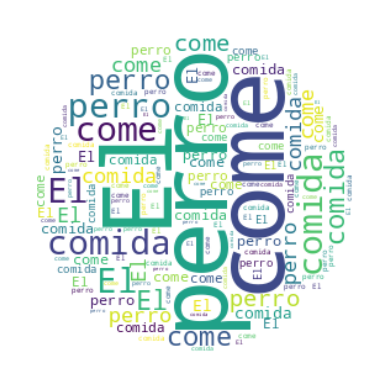

In [ ]:
# Texto de ejemplo
texto = "El perro corre r√°pidamente por el parque."

# Tokenizaci√≥n del texto en palabras
palabras = nltk.word_tokenize(texto)

# Definir el valor de n para los n-gramas
n = 2

# Calcular los n-gramas
ngramas = ngrams(palabras, n)

# Calcular la frecuencia de los n-gramas
frecuencia_ngramas = nltk.FreqDist(ngramas)

# Mostrar los n-gramas y su frecuencia
for ngrama, frecuencia in frecuencia_ngramas.items():
    print(' '.join(ngrama), ':', frecuencia)

#gr√°fico:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wc = WordCloud(background_color = "white", repeat = True, mask = mask)
wc.generate(text)
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

***
***

# Probabilidad ¬°La clave!




<center>
 <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/prob.png?raw=1" alt="prob" width="50%" height="50%">
</center>

**Motivaci√≥n**

Frente a un fen√≥meno aleatorio, el resultado es incierto y su predicci√≥n se vuelve un desaf√≠o. La probabilidad se convierte en nuestra br√∫jula en este territorio de incertidumbre.

**Analicemos ejemplos:**

# ***¬øCu√°l ser√° el siguiente t√©rmino en una secuencia de palabras generada por un modelo de lenguaje?***

Aunque no podemos predecir exactamente qu√© palabra seguir√°, podemos calcular la probabilidad condicional de que una palabra determinada siga a otra dentro del contexto de la secuencia.

# ***¬øQu√© tan probable es que un mensaje de texto sea spam?***
No podemos afirmar con certeza si un mensaje es spam o no, pero podemos usar t√©cnicas de procesamiento del lenguaje natural, como la clasificaci√≥n de texto, para calcular la probabilidad de que un mensaje en particular sea spam basado en caracter√≠sticas como las palabras utilizadas y el contexto.

# ***¬øCu√°l es la probabilidad de que un documento sea relevante para una consulta de b√∫squeda?***
Al buscar en un motor de b√∫squeda, no podemos predecir con certeza qu√© documentos ser√°n relevantes para la consulta del usuario. Sin embargo, podemos utilizar algoritmos de procesamiento del lenguaje natural y modelos de recuperaci√≥n de informaci√≥n para calcular la probabilidad de relevancia de un documento en funci√≥n de la coincidencia de palabras clave y la sem√°ntica del texto.




## Conceptos:




### Distribuci√≥n de probabilidad:

La distribuci√≥n de probabilidad es una funci√≥n matem√°tica que describe las posibles ocurrencias de un evento y la probabilidad asociada a cada una de ellas. En otras palabras, indica c√≥mo se distribuyen las probabilidades entre los diferentes resultados posibles de un fen√≥meno aleatorio.

Una **distribuci√≥n de probabilidad** es una funci√≥n $ P: \{ sucesos \} \rightarrow [0,1]$.

Denotamos por $\Omega$ al conjunto total de resultados posibles, donde cada elemento en $ \Omega$ se llama suceso elemental.
El suceso imposible se denota como $\emptyset$.

Un suceso es un conjunto formado mediante la uni√≥n, intersecci√≥n o complementaci√≥n de **sucesos elementales**. Si $A$ es un **suceso**, $P(A)$  es la probabilidad de $A$, donde $ 0 \leq P(A) \leq 1$.

Para dos sucesos $A$ y $B$:
* $A \cup B $ representa la uni√≥n de $A$ y $B$, se cumple si al menos uno de los dos sucesos ocurre.
* $A \cap B$ representa la intersecci√≥n de $A$ y $B$, se cumple si ambos sucesos ocurren.
* $A^c$ es el complemento de $A$: se cumple exactamente cuando $A$ no ocurre.

**Propiedades:**
Una distribuci√≥n de probabilidad $P(X)$ para una variable aleatoria discreta $X$ debe satisfacer las siguientes propiedades:
1. $0 \leq P(X = x_i) \leq 1$ para todo valor de $x_i$.
2. La suma de las probabilidades para todos los posibles valores de $X$ es igual a 1:
$ \sum_{i} P(X = x_i) = 1 $.

Adem√°s:

*  El **suceso total** es $P(\Omega)=1$.
*  $P(\emptyset)=0$

### Regla de Laplace

En el caso en el que los sucesos elementales sean equiprobables, podemos calcular la probabilidad de un suceso $A$ de la siguiente forma:

$$P(A)=\frac{|A|}{|\Omega|} = \frac{\text{# de casos favorables}}{\text{# de casos posibles}}$$

***Ejemplos:***

Teniendo en cuenta el texto que venimos trabajando, y suponiendo que deseamos calcular la probabilidad de seleccionar una palabra de longitud mayor o igual a 10 caracteres al azar del texto proporcionado. ¬øCu√°l es la probabilidad de que una palabra elegida al azar tenga esta longitud o mayor?

In [ ]:
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Contar cu√°ntas palabras tienen una longitud mayor o igual a 10 caracteres
num_palabras_largas = sum(1 for palabra in palabras if len(palabra) >= 10)

# Calcular la probabilidad

probabilidad = num_palabras_largas / len(palabras)

print("N√∫mero total de palabras (# de casos posibles):", len(palabras))
print("N√∫mero de palabras con longitud mayor o igual a 10 (# de casos favorables):", num_palabras_largas)
print("Probabilidad de seleccionar una palabra de longitud mayor o igual a 10:", probabilidad)

N√∫mero total de palabras (# de casos posibles): 218
N√∫mero de palabras con longitud mayor o igual a 10 (# de casos favorables): 30
Probabilidad de seleccionar una palabra de longitud mayor o igual a 10: 0.13761467889908258


***Ejercicio:***
¬øCu√°l es la probabilidad de que al seleccionar una palabra al azar del texto de ejemplo, comience por la letra *e*? sabiendo que hay 35 palabras, de las 218 que comienzan por e.

In [ ]:
# @title Rta:
# Dividir el texto en palabras
palabras = texto_limpio.split()
# Contar cu√°ntas palabras comienzan con la letra "e"
num_palabras_e = sum(1 for palabra in palabras if palabra.lower().startswith('e'))

# Calcular la probabilidad
probabilidad_palabra_e = num_palabras_e / len(palabras)

print("N√∫mero total de palabras:", len(palabras))
print("N√∫mero de palabras que comienzan con 'e':", num_palabras_e)
print("Probabilidad de que una palabra comience con 'e':", probabilidad_palabra_e)

N√∫mero total de palabras: 218
N√∫mero de palabras que comienzan con 'e': 35
Probabilidad de que una palabra comience con 'e': 0.16055045871559634


### Probabilidad condicionada

Dados dos sucesos, $A$ y $B$, si $n_{A \cap B}$ es la frecuencia de resultados en los que se cumplen $A$  y $B$ a la vez en $N$ *experimentos*, entonces $\frac{n_{A \cap B}}{n_{B}}$ expresa la proporci√≥n de casos en los que sucede $A$ entre los que sucede $B$.

Como $$\frac{n_{A \cap B}}{n_{B}} = \frac{n_{A \cap B}/N}{n_{B}/N} \xrightarrow[N \rightarrow +\infty]{}\frac{P(A \cap B)}{P(B)},$$

se define la **probabilidad de $A$ condiciona a $B$** como la probabilidad de $A$ si damos por supuesto que sucede $B$, esto es:

$$P(A|B)=\frac{P(A \cap B)}{P(B)}$$.



***Ejemplo:***

Supongamos que queremos calcular la probabilidad de que una palabra seleccionada al azar del texto comience con la letra "e", dado que esa palabra tiene una longitud mayor o igual a 10 caracteres.

Para calcular esta probabilidad condicionada, primero necesitamos contar el n√∫mero de palabras que cumplen con ambas condiciones (longitud mayor o igual a 10 caracteres y comienzo con "e"), y luego dividirlo por el n√∫mero total de palabras que tienen una longitud mayor o igual a 10 caracteres.

In [ ]:
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Contar palabras con longitud mayor o igual a 10 caracteres
num_palabras_largas = sum(1 for palabra in palabras if len(palabra) >= 10)

# Contar palabras que comienzan con "e" y tienen longitud mayor o igual a 10 caracteres
num_palabras_e_largas = sum(1 for palabra in palabras if len(palabra) >= 10 and palabra.lower().startswith('e'))

# Calcular la probabilidad condicionada
probabilidad_condicionada = num_palabras_e_largas / num_palabras_largas

print("N√∫mero total de palabras con longitud mayor o igual a 10:", num_palabras_largas)
print("N√∫mero de palabras que comienzan con 'e' y tienen longitud mayor o igual a 10:", num_palabras_e_largas)
print("Probabilidad de que una palabra comience con 'e' dado que tiene longitud mayor o igual a 10:", probabilidad_condicionada)

N√∫mero total de palabras con longitud mayor o igual a 10: 30
N√∫mero de palabras que comienzan con 'e' y tienen longitud mayor o igual a 10: 4
Probabilidad de que una palabra comience con 'e' dado que tiene longitud mayor o igual a 10: 0.13333333333333333


***Ejercicio:***

En el texto dado, consideramos las palabras que tienen una longitud menor a 5 caracteres. Si seleccionamos una palabra al azar de entre estas palabras, ¬øcu√°l es la probabilidad de que esa palabra termine con la letra "s"?

In [ ]:
# @title Rta
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Contar palabras con longitud menor a 5 caracteres
num_palabras_cortas = sum(1 for palabra in palabras if len(palabra) < 5)

# Contar palabras que terminen con "s" y tienen longitud menora 5 caracteres
num_palabras_s_cortas = sum(1 for palabra in palabras if len(palabra) < 5 and palabra.lower().endswith('s'))

# Calcular la probabilidad condicionada
probabilidad_condicionada = num_palabras_s_cortas / num_palabras_cortas

print("N√∫mero total de palabras con longitud menor a 5:", num_palabras_cortas)
print("N√∫mero de palabras que terminan con 's' y tienen longitud menor a 10:", num_palabras_s_cortas)
print("Probabilidad de que una palabra termine con 's' dado que tiene longitud menor a 5:", probabilidad_condicionada)

N√∫mero total de palabras con longitud menor a 5: 99
N√∫mero de palabras que terminan con 's' y tienen longitud menor a 10: 14
Probabilidad de que una palabra termine con 's' dado que tiene longitud menor a 5: 0.1414141414141414


### Propiedades de la probabilidad condicional:

   
* Independencia: Dos eventos $A$ y $B$ son independientes si y solo si la probabilidad de que ocurra $A$ no se ve afectada por la ocurrencia de $B$, y viceversa. Esto se expresa matem√°ticamente como:

$$P(A|B) = P(A) \quad \text{y} \quad P(B|A) = P(B)$$
        
* Regla del Producto: La probabilidad de la intersecci√≥n de dos eventos $A$ y $B$ puede calcularse utilizando la probabilidad condicionada:

$$P(A \cap B) = P(A|B) \cdot P(B)$$
        
* Teorema de Bayes: Es una herramienta poderosa que nos permite actualizar nuestras creencias sobre la ocurrencia de un evento $A$ dado que ha ocurrido otro evento $B$.

    Como $$P(A|B)=\frac{P(A \cap B)}{P(B)} \quad \text{y} \quad P(B|A)=\frac{P(A \cap B)}{P(A)},$$

    y
    
    $$P(A \cap B) =P(B) \cdot P(A|B) = P(A) \cdot P(B|A)$$

    Entonces:
    
    $$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$
    

### Variables aleatorias:

Una variable aleatoria (v.a.) es como un *contenedor* de resultados posibles en un experimento. Piensa en ella como una herramienta que nos ayuda a asignar n√∫meros a los resultados de un evento que no es fijo (aleatorio).

Por ejemplo, imagina que est√°s lanzando un dado. Cada vez que lo lanzas, obtienes un n√∫mero diferente. Ese n√∫mero que obtienes, ya sea un 1, un 2, un 3, hasta un 6, es el valor de tu variable aleatoria para ese lanzamiento.

Si est√°s midiendo la temperatura de una habitaci√≥n y obtienes diferentes lecturas cada vez que tomas la temperatura, entonces esa temperatura medida es una variable aleatoria. Puedes obtener 25 grados, 25.5 grados, 26 grados, etc.

En resumen, una variable aleatoria es una manera de representar num√©ricamente los resultados de un experimento aleatorio. No es solo un n√∫mero aleatorio, sino una manera de organizar y entender la informaci√≥n que obtenemos de nuestros experimentos.


**Formalmente:**

En t√©rminos m√°s formales, una (v.a.) es una funci√≥n que asigna un n√∫mero real a cada resultado posible de un experimento aleatorio. Si denotamos la variable aleatoria como $X$, entonces para cada resultado $x$ del experimento, $X$ asigna un valor que es un n√∫mero real ($x \in \mathbb{R}$):

$$X: \Omega \rightarrow \mathbb{R}$$




### Variables aleatorias discretas:

Una v.a. es discreta si la cantidad de valores que puede tomar es numerable:
$$x_{1}, x_{2}, x_{3},...$$

En una v.a. discreta $ p_{k}= P(X=k)$ es la funci√≥n de probabilidad o de masa. Se cumple $\sum p_{x_{i}}=1$, esto es, las probabilidades de todos los valores que la v.a. discreta puede tomar suman 1.

***Ejemplos:***


### Variables aleatorias continuas:

Una v.a. **continua** $X$ cumple que para todo n√∫mero $k$, la probabilidad de que $X$ lo tome es nula, esto es $P(X=k)=0$. La probabilidad que interesa es la de que tome valores en cualquier intervalo, esto es:
* La probabilidad de (a,b) es $P(a < x < b)$, que es la misma que la de $[a,b]$, $[a,b)$ √≥ $(a,b]$.
* La probabilidad de $(a, +\infty)$ es $P(X>a)$.
* La probabilidad de $(-\infty, a)$ es $P(X<a)$.

***Ejemplos:***


### Funci√≥n de densidad:

Dada $X$ una v.a. continua, una funci√≥n $f\geq0$ es la funci√≥n de densidad de $X$ si la probabilidad de $(a,b)$ es igual al √°rea de la regi√≥n limitada por la gr√°fica $y=f(x)$, y las rectas $y=0$, $x=a$ y $x=b$.


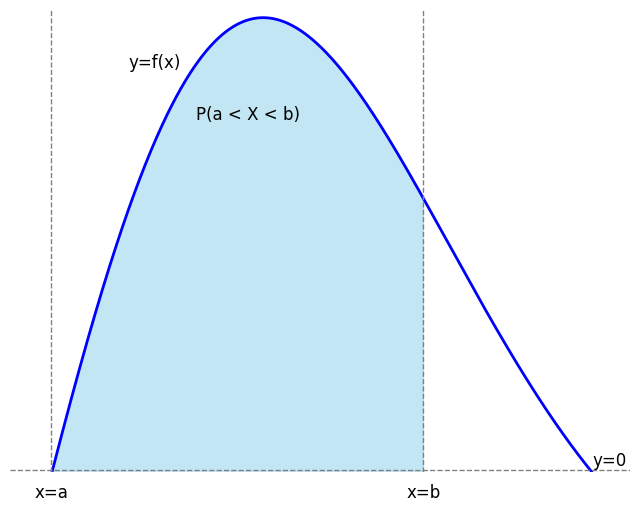

In [ ]:
# @title funci√≥n de densidad { vertical-output: true, display-mode: "form" }
# Definir la funci√≥n de densidad de probabilidad (PDF)
def f(x):
    # Puedes definir tu propia funci√≥n de densidad aqu√≠
    funcion= x * np.exp(-x**2 / 3) / np.sqrt(2 * np.pi)
    return funcion

# Definir los l√≠mites del intervalo [a, b]
a = 0.2
b = 3

# Generar valores de x en el intervalo [a, b]
x_values = np.linspace(a, b, 1000)

# Calcular los valores de y = f(x)
y_values = f(x_values)

# Crear la gr√°fica
plt.figure(figsize=(8, 6))

# Graficar la funci√≥n de densidad de probabilidad (PDF)
plt.plot(x_values, y_values, 'b-', linewidth=2)

# Rellenar el √°rea bajo la curva entre x=a y x=b
plt.fill_between(x_values, 0.05, y_values, where=(x_values >= a) & (x_values <= b-1), color='skyblue', alpha=0.5)

# L√≠neas verticales en x=a y x=b
plt.axvline(x=a, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=b-1, color='gray', linestyle='--', linewidth=1)

# L√≠neas horizontal en y=0
plt.axhline(y=0.081, xmin=0, xmax=1.6, color='gray', linestyle='--', linewidth=1)

# Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Agregar texto en x=-2 (x=a) y x=2 (x=b)
plt.text(a, 0.07, 'x=a', ha='center', va='center', color='black', fontsize=12)
plt.text(b-1, 0.07, 'x=b', ha='center', va='center', color='black', fontsize=12)

plt.text(0.7, 0.275, 'y=f(x)', ha='center', va='center', color='black', fontsize=12)

plt.text(1.15, 0.25, 'P(a < X < b)', ha='center', va='center', color='black', fontsize=12)

plt.text(2.9, 0.085, 'y=0', ha='center', va='center', color='black', fontsize=12)


# Establecer l√≠mites y mostrar la gr√°fica
plt.ylim(0.08, 0.3)  # Ajustar el l√≠mite y
plt.xlim(0, np.max(x_values))  # Ajustar el l√≠mite x
# Mostrar la gr√°fica
plt.grid(True)
plt.axis('off')
plt.show()


### Propiedades:

* El √°rea total entre $y=0$ e $y=f(x)$ es igual a 1.
* El √°rea a la derecha de $x=b$ delimitada por $y=0$ e $y=f(x)$ es $P(X > b)$.
* El √°rea a la izquierda de $x=a$ delimitada por $y=0$ e $y=f(x)$ es $P(X < a)$.


### Distribuci√≥n normal est√°ndar:
La d.p. continua m√°s importante es la **distribuci√≥n normal est√°ndar** $N(0,1)$, esto es, la distribuci√≥n normal de *media* 0 y *desviaci√≥n t√≠pica* 1.

Su funci√≥n de densidad tiene la forma llamada ***campana de Gauss***, y es sim√©trica respecto a $x=0$.

**Nota:**
Una variable gen√©rica con distribuci√≥n $N(0,1)$ se suele denotar $Z$ (en lugar de $X$), y escribimos $Z \sim N(0,1)$.



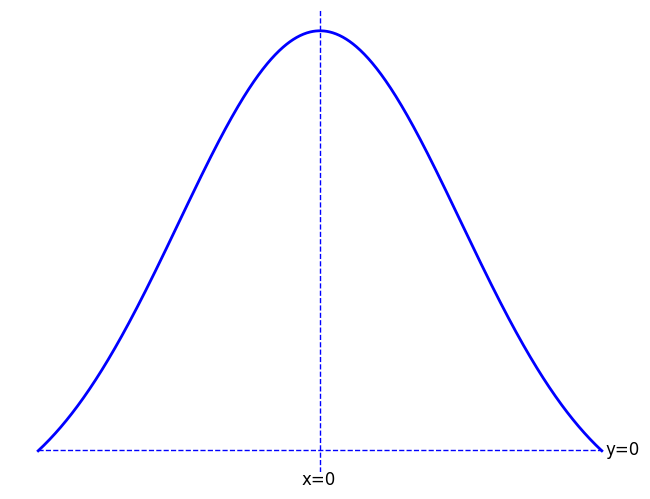

In [ ]:
# @title Crea distribuci√≥n normal est√°ndar { vertical-output: true }
def f(x):
    # Puedes definir tu propia funci√≥n de densidad aqu√≠
    # Por ejemplo, una distribuci√≥n normal est√°ndar
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Definir los l√≠mites del intervalo [a, b]
a = -2
b = 2

# Generar valores de x en el intervalo [a, b]
x_values = np.linspace(a, b, 1000)

# Calcular los valores de y = f(x)
y_values = f(x_values)

# Crear la gr√°fica
plt.figure(figsize=(8, 6))

# Graficar la funci√≥n de densidad de probabilidad (PDF)
plt.plot(x_values, y_values, 'b-', linewidth=2)

# L√≠neas horizontal en y=0
plt.hlines(y=0.055, xmin=-2, xmax=2, color='blue', linestyle='--', linewidth=1)


# L√≠neas verticales en x=a y x=b
plt.axvline(x=0, color='blue', linestyle='--', linewidth=1)

# Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.text(2.15, 0.055, 'y=0', ha='center', va='center', color='black', fontsize=12)
plt.text(-0.01, 0.03, 'x=0', ha='center', va='center', color='black', fontsize=12)

# Mostrar la gr√°fica
plt.grid(True)
plt.axis('off')
plt.show()


<!-- ### Variables aleatorias continua:

Una v.a. continua ùëã cumple que para todo n√∫mero ùëò, la probabilidad de que ùëã lo tome es nula, esto es ùëÉ(ùëã=ùëò)=0. La probabilidad que interesa es la de que tome valores en cualquier intervalo, esto es:
La probabilidad de (ùëé, ùëè) es ùëÉ(ùëé<ùëã<ùëè), que es la misma que la de [ùëé, ùëè), (ùëé, ùëè] o [ùëé, ùëè].
La probabilidad de (ùëé,+‚àû) es ùëÉ(ùëã>ùëé).
La probabilidad de (‚àí‚àû, ùëé) es ùëÉ(ùëã<ùëé) -->

### Distribuci√≥n normal:
Si $Z \thicksim N(0,1)$, dados dos valores $\mu$ y $\sigma (\sigma > 0)$ la v.a. $X = \mu + \sigma Z$  tiene la distribuci√≥n normal $N(\mu,\sigma)$ de media $\mu$ y desviaci√≥n t√≠pica $\sigma$. Se escribe $X \thicksim N(\mu,\sigma)$.

Su funci√≥n de densidad es tambi√©n una campana de Gauss, centrada en $x=\mu$ y sim√©trica respecto a esta recta. En $\mu-\sigma$ y $\mu+\sigma$ est√°n los puntos de inflexi√≥n.


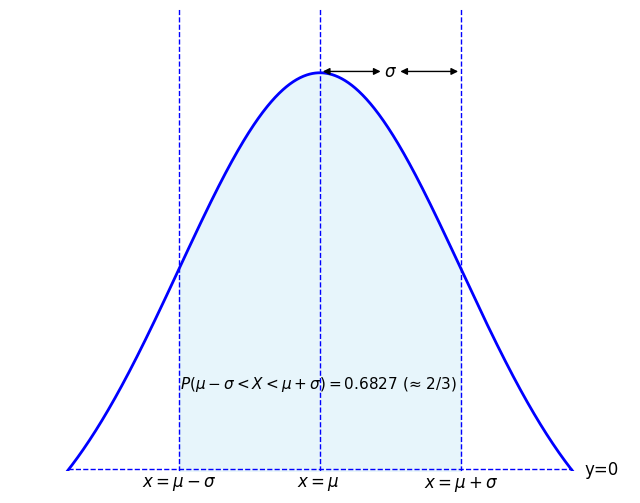

In [ ]:
# @title Crea distribuci√≥n normal est√°ndar { vertical-output: true }
def f(x):
    # Puedes definir tu propia funci√≥n de densidad aqu√≠
    # Por ejemplo, una distribuci√≥n normal est√°ndar
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Definir los l√≠mites del intervalo [a, b]
a = -2
b = 2

# Generar valores de x en el intervalo [a, b]
x_values = np.linspace(a, b, 1000)

# Calcular los valores de y = f(x)
y_values = f(x_values)

# Crear la gr√°fica
plt.figure(figsize=(8, 6))

# Graficar la funci√≥n de densidad de probabilidad (PDF)
plt.plot(x_values, y_values, 'b-', linewidth=2)


# Rellenar el √°rea bajo la curva entre x=a y x=b
plt.fill_between(x_values, 0, y_values, where=(x_values >= a+1) & (x_values <= b-1), color='skyblue', alpha=0.2)



# L√≠neas verticales en x=a y x=b
plt.axvline(x=0, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=-1, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=1, color='blue', linestyle='--', linewidth=1)

# L√≠neas horizontal en y=0
plt.hlines(y=0.082, xmin=-1.79, xmax=1.79, color='blue', linestyle='--', linewidth=1)


# Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)


plt.annotate('', xy=(0, 0.4), xytext=(0.45, 0.4),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))

plt.annotate('', xy=(0.55, 0.4), xytext=(1, 0.4),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))
plt.text(0.5, 0.4, '$\sigma$', ha='center', va='center', color='black', fontsize=12)

plt.text(2, 0.082, 'y=0', ha='center', va='center', color='black', fontsize=12)
plt.text(-0.01, 0.07, f'$x=\mu$', ha='center', va='center', color='black', fontsize=12)
plt.text(-1, 0.07, f'$x=\mu-\sigma$', ha='center', va='center', color='black', fontsize=12)
plt.text(1, 0.07, f'$x=\mu+\sigma$', ha='center', va='center', color='black', fontsize=12)

plt.text(-0.01, 0.15, f'$P(\mu-\sigma<X<\mu+\sigma)= 0.6827$ (‚âà 2/3)', ha='center', va='center', color='black', fontsize=11)

plt.ylim(0.08, 0.45)  # Ajustar el l√≠mite y


# Mostrar la gr√°fica
plt.grid(False)
plt.axis('off')
plt.show()


### Propiedades de la distribuci√≥n normal:

Dada una v.a. $X$ (normal o no) de media $\mu$ y desviaci√≥n t√≠pica $\sigma$ la probabilidad de que $X$ tome un valor que se aleje de su media una distancia inferior a $k$ veces su desviaci√≥n t√≠pica se expresa:

$$P(|X-\mu|<k \sigma) = P(-k\sigma <X-\mu < k\sigma)=P(\mu-k\sigma<X<\mu+k\sigma)$$


Dada $ X \thicksim N(\mu, \sigma)$, destacamos las siguientes probabilidades:

* $P(\mu-\sigma<X<\mu+\sigma)= 0.6827$, por lo tanto, algo m√°s de 2 de cada 3 veces el valor de una *distribuci√≥n normal* no se aleja de la media m√°s de 1 desviaci√≥n t√≠pica $(2/3 = 0.6)$;

* $P(\mu -2\sigma < X < \mu+2\sigma)=0.9545$,  por lo tanto, algo m√°s del 95% de las veces el valor de una distribuci√≥n normal no se aleja de la media m√°s de 2 desviaciones t√≠picas;

* $P(\mu -3\sigma < X < \mu+3\sigma)=0.9973$, por lo tanto, es muy probable que el valor de una distribuci√≥n normal no se aleje de la media m√°s de 3 desviaciones t√≠picas.

* Rec√≠procamente, si $X \thicksim N(\mu, \sigma)$ entonces su tipificada
$Z=(X-\mu)/\sigma$ cumple que $Z \thicksim N(0, 1)$. Esto es, al tipificar una distribuci√≥n normal obtenemos la distribuci√≥n normal est√°ndar.

    La distribuci√≥n normal aparece con frecuencia en amplios campos de la investigaci√≥n. Es una d.p. muy interesante ya que, hablando informalmente, si el resultado de la variable a estudiar viene dado por la suma de un gran n√∫mero de variables id√©nticas e independientes (que seguramente no sabremos medir) es de esperar que la d.p. resultante sea muy aproximadamente normal.



### Distribuci√≥n $t$ de student:

La $t$ de Student con $n$ grados de libertad $n=(1,2,3,...)$ es una distribuci√≥n continua. Si una v.a. $T$ sigue una distribuci√≥n $t$ de Student con $n$ grados de libertad, se escribe $T \thicksim t_{n}$.

Como $N(0,1)$, $t_{n}$ est√° centrada en ùë•$x=0$ y es sim√©trica con respecto a esta recta.
Se tiene $$t_{n} \xrightarrow[N \rightarrow +\infty]{} N(0,1)$$.

Es una d.p. que se usa para hacer inferencia sobre la media. Dadas $X_{1}, X_{2}, ..., X_{n}$ variables aleatorias independientes con una misma distribuci√≥n normal $N(\mu,\sigma)$, con media muestral $\bar{X}$ y cuasidesviaci√≥n t√≠pica $S_{X}$, entonces:

$$\frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}\thicksim t_{n-1}$$

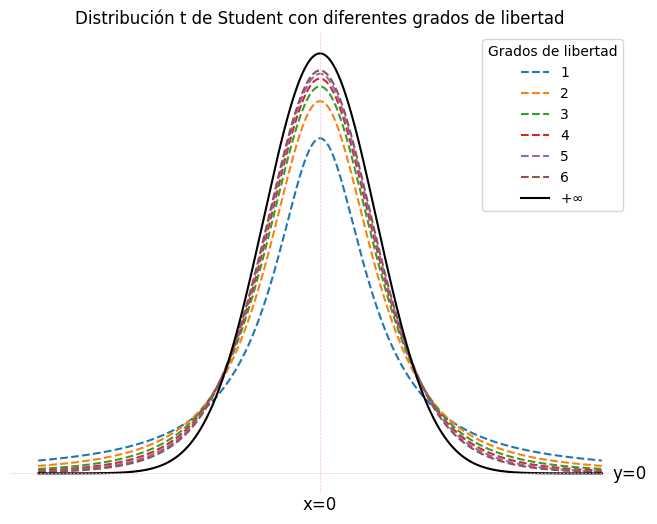

In [ ]:
# @title Crea distribuci√≥n t de student
# import numpy as np
# import matplotlib.pyplot as plt
from scipy.stats import t

# Definir el rango para x
x = np.linspace(-5, 5, 1000)

# Grados de libertad para las distribuciones t de Student
grados_de_libertad = [1, 2, 3, 4, 5,6,7]  # A√±ad√≠ 1000 como infinito

# Crear una nueva figura
plt.figure(figsize=(8, 6))

# Graficar las distribuciones t de Student para diferentes grados de libertad
for df in grados_de_libertad[:-1]:
    plt.plot(x, t.pdf(x, df), label=f'{df}', linestyle="--")
plt.plot(x, t.pdf(x, 10000000000), label=f'$+\infty$', linestyle="-", color="black")

# Agregar texto en x=0 que muestra la media
plt.text(0, -0.03, 'x=0', ha='center', va='center', color='black', fontsize=12)

# Agregar texto en x=0 que muestra la media
plt.text(5.5, 0, 'y=0', ha='center', va='center', color='black', fontsize=12)

# Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# L√≠neas verticales en x=a y x=b
plt.axvline(x=0, color='pink', linestyle='--', linewidth=0.5)

# L√≠neas verticales en x=a y x=b
plt.axhline(y=0, color='pink', linestyle='--', linewidth=0.5)

# A√±adir t√≠tulo y leyenda
plt.title('Distribuci√≥n t de Student con diferentes grados de libertad')
plt.legend(title="Grados de libertad")

# Mostrar la gr√°fica
plt.grid(False)
plt.axis('off')

plt.show()


### ¬øC√≥mo utilizar las tablas de distribuciones?

**Tabla de la distribuci√≥n normal est√°ndar $N(0,1)$**

En la tabla $N(0,1)$ se indican, para $z \in \{0.00, 0.001, 0.002, ..., 2.99, 3.0, 3.1, ..., 7.9\}$, las probabilidades $P(Z>z)$, esto es la probabilidad de que una v.a. $Z \thicksim N(0,1)$ tome un valor mayor que $z$.


<!-- *Nota:* Para los valores $z$ comprendidos entre $0$ y $2.99$ la fila nos indica el primer decimal y la columna el segundo decimal. Para los valores $z$ comprendidos entre $3$ y $7.9$ la  fila nos indica la unidad y la columna el primer decimal. -->


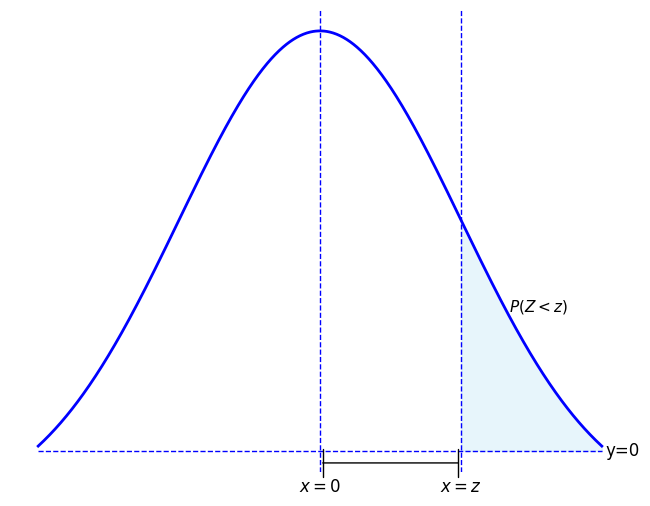

In [ ]:
# @title Informaci√≥n de una tabla de la distribuci√≥n normal est√°ndar { vertical-output: true }
def f(x):
    # Puedes definir tu propia funci√≥n de densidad aqu√≠
    # Por ejemplo, una distribuci√≥n normal est√°ndar
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Definir los l√≠mites del intervalo [a, b]
a = -2
b = 2

# Generar valores de x en el intervalo [a, b]
x_values = np.linspace(a, b, 1000)

# Calcular los valores de y = f(x)
y_values = f(x_values)

# Crear la gr√°fica
plt.figure(figsize=(8, 6))

# Graficar la funci√≥n de densidad de probabilidad (PDF)
plt.plot(x_values, y_values, 'b-', linewidth=2)


# Rellenar el √°rea bajo la curva
plt.fill_between(x_values, 0.05, y_values, where=(x_values >= 1) & (x_values <= 2), color='skyblue', alpha=0.2)



# # L√≠neas verticales en x=a y x=b
plt.axvline(x=0, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=1, color='blue', linestyle='--', linewidth=1)

# L√≠neas horizontal en y=0
plt.hlines(y=0.05, xmin=-2, xmax=2, color='blue', linestyle='--', linewidth=1)


# # Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)


plt.annotate('', xy=(0, 0.04), xytext=(1, 0.04),
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))


plt.text(0, 0.02, f'$x=0$', ha='center', va='center', color='black', fontsize=12)

plt.text(2.15, 0.05, 'y=0', ha='center', va='center', color='black', fontsize=12)

plt.text(1, 0.02, f'$x=z$', ha='center', va='center', color='black', fontsize=12)

plt.text(1.55, 0.17, f'$P(Z<z)$', ha='center', va='center', color='black', fontsize=11)

# # Mostrar la gr√°fica
plt.grid(False)
plt.axis('off')
plt.show()


[Tablas de distribuciones](https://estadistica-dma.ulpgc.es/estadFCM/pdf/distribuciones.pdf)

En la tabla $t_{n}$ se ubican los valores cr√≠ticos $t_{n;p}$ (tambi√©n puede usarse la notaci√≥n $t(n;p)$), con

$n \in \{1, 2, 3, ..., 40, 45, 46, ..., 100, 125, +\infty \}$

$p \in \{0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45 \}$

de manera que para $T \thicksim t_{n}$ se tiene que


In [ ]:
#incluir aqu√≠ el gr√°fico

### C√°lculo de probabilidades y abscisas

A la hora de calcular probabilidades y de obtener abscisas usando las tablas de probabilidad de la normal est√°ndar y de la $t$ de Student debemos tener en cuenta que son sim√©tricas con respecto a $x=0$, esto es,
$$P(V < v)=P(V < -v)$$
y
$$P(V > 0)=0.5$$

siendo $V$ una v.a. con d.p.$N(0,1)$ o $t_{n}$.

Una propiedad com√∫n para cualquier v.a. cntinua $X$ es:

$$P(X < x ) = P(X \leq x) = P([ X > x]^{c}) = 1- P(X > x)$$

**Ejercicio (I):** Data $Z \thicksim N(0,1)$, calcular:

*   Las probabilidades:
    * $P(Z > 2.3 )$
    * $P(Z < -2.3)$
    * $P(-2.3 < Z < 1.41)$

* Los valores de $x$ tales que:
    * $P(Z > x ) = 0.025$
    * $P(Z > x ) = 0.05$
        
**Ejercicio (II):**

*   Dada $T \thicksim t_{5}$, calcular:
    * $P(T > 1.1558)$
    * $P(T < x) = 0.95$




In [ ]:
# Las probabilidades
# P(Z > 2.3)
prob_z_gt_2_3 = 1 - norm.cdf(2.3)
print("P(Z > 2.3):", prob_z_gt_2_3)

# P(Z < -2.3)
prob_z_lt_minus_2_3 = norm.cdf(-2.3)
print("P(Z < -2.3):", prob_z_lt_minus_2_3)

# P(-2.3 < Z < 1.41)
prob_z_between_minus_2_3_and_1_41 = norm.cdf(1.41) - norm.cdf(-2.3)
print("P(-2.3 < Z < 1.41):", prob_z_between_minus_2_3_and_1_41)

# Los valores de x
# P(Z > x) = 0.025
x_025 = norm.ppf(1 - 0.025)
print("Valor de x tal que P(Z > x) = 0.025:", x_025)

# P(Z > x) = 0.05
x_05 = norm.ppf(1 - 0.05)
print("Valor de x tal que P(Z > x) = 0.05:", x_05)


P(Z > 2.3): 0.010724110021675837
P(Z < -2.3): 0.010724110021675809
P(-2.3 < Z < 1.41): 0.9100060485249318
Valor de x tal que P(Z > x) = 0.025: 1.959963984540054
Valor de x tal que P(Z > x) = 0.05: 1.6448536269514722


***
***

# Inferencia

<center>
<img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/ingerencia.png?raw=1" alt="inferencia" width="50%" height="50%">  
</center>

Para estudiar alg√∫n aspecto de la distribuci√≥n de una variable $X$, tomamos una muestra de $n$ valores independientes de $X: x_{1}, x_{2}, ... , x_{n}$. En ***Estad√≠stica Inferencial*** se estudia qu√© afirmaciones podemos hacer sobre los aspectos que nos interesan de $X$, y con qu√© fiabilidad, en base a los valores de la muestra. La muestra puede consistir, por ejemplo, en los datos de $n$ personas encuestadas o los resultados de $n$ mediciones experimentales.

Abordaremos dos aspectos:

* **La media:** por ejemplo, ¬øpodemos afirmar que la palabra "tecnolog√≠a" aparece en promedio 10 veces en los art√≠culos de tecnolog√≠a?
* **La proporci√≥n:** por ejemplo, ¬øpodemos afirmar que la un tercio de los documentos relacionados con la pol√≠tica mencionan al partido que se encuentra actualmente en el poder?

## Inferencia sobre la media

Sabemos (o suponemos) que la poblaci√≥n $X$ es normal, $X \thicksim N(\mu, \sigma)$. El valor $\mu$ es la media poblacional, y nos restringiremos a afirmaciones sobre $\mu$. A $\sigma$ se le llama desviaci√≥n t√≠pica poblacional.

Como condiciones de validez, deben cumplirse que los casos $X_{i}$ sean independientes (el valor de cada uno no tiene influencia en los dem√°s) y para cada $i$ùëñ, $X_{i} \thicksim N(\mu, \sigma)$.

La **media muestral** es
$$ \bar{X}= \frac{1}{n} \sum_{i=1}^{n}X_{i}, $$
y la **cuasidesviaci√≥n t√≠pica muestral** es

$$S_{X}=\sqrt{\frac{1}{(n-1)}\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}}$$

La base de nuestra inferencia es que, como indicamos al tratar la distribuci√≥n normal y la distribuc√≠n $t$ de student,

$$\frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}\thicksim t_{n-1}$$

Obviamente $\frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}$ es una variable aleatoria, su valor depende de nuestra muestra

## Inferencia sobre la proporci√≥n

Estudiamos una caracter√≠stica. La probabilidad de que un caso aleatoriamente elegido la cumpla es $p$, la proporci√≥n poblacional. En una muestra de $n$ individuos (casos) la cumplen $k$, y $\hat{p}=\frac{k}{n}$ es la **proporci√≥n muestral**. La base de nuestra inferencia es que, si $n$ es grande,


$$\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}} \underset{\text{aprox}}{\sim} N(0,1) $$

Adem√°s se deben cumplir las siguientes condiciones de validez:

* La muestra es ***independiente y representativa*** (en los casos elegidos esperamos que la probabilidad de cumplir la caracter√≠stica sea efectivamente la proporci√≥n muestral).

* O bien $n \geq 30$; o bien $np \geq 5$ y $n(1-p)\geq 5$.

  Esto significa que la aproximaci√≥n es mala cuando $p \approx 0$ o $p \approx 1$. Como no conocemos $p$ esta condici√≥n la sustituimos por $n \hat{p} = k \geq 5 $ y $n(1-\hat{p})=n-k \geq 5.$

### Resultados de inferencia

Nos centramos en tres tipos de inferencia, que realizaremos para la media y para la proporci√≥n:
* intervalos de confianza
* contrastes de hip√≥tesis
* tama√±o de la muestra

Estos resultados depender√°n de la fiabilidad establecida, que se expresa mediante el nivel de confianza como $1-\alpha$ donde $\alpha$ (que suele representar una probabilidad peque√±a) es el nivel de significaci√≥n.

Habitualmente:
* $\alpha = 0.1 $, por lo tanto $1-\alpha = 0.9$, lo que indica que se tiene el $90\%$ de confianza.

* $\alpha = 0.05$, por lo tanto $1-\alpha = 0.95$, lo que indica que se tiene el $95\%$ de confianza.

* $\alpha = 0.01$, por lo tanto $1-\alpha = 0.99$, lo que indica que se tiene el $99\%$ de confianza.



## Intervalos de confianza

### Intervalo de confianza para la media

Para obtener el intervalo de confianza para la media de una poblaci√≥n normal con nivel de confianza $1-\alpha$ usamos que

$$\frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}\thicksim t_{n-1}$$


$$1- \alpha = P\Big( -t_{n-1;\alpha/2} < \frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}\thicksim t_{n-1} < t_{n-1;\alpha/2}\Big)$$

despejamos $\mu$ y llamamos como error muestral a

$$EM= t_{n-1;\alpha/2}S_{X}/\sqrt{n}$$

Entonces:

\begin{align*}
1-\alpha &= P(-EM < \bar{X} - \mu < \bar{X} + EM) \\
&= P(\bar{X} -EM < \mu < \bar{X} + EM) \\
&= P(\mu \in (\bar{X} -EM,\bar{X} +EM))
\end{align*}

El valor $1-\alpha$ representa la probabilidad de que el intervalo dado (en la formula) contenga el verdadero valor del par√°metro $\mu$.

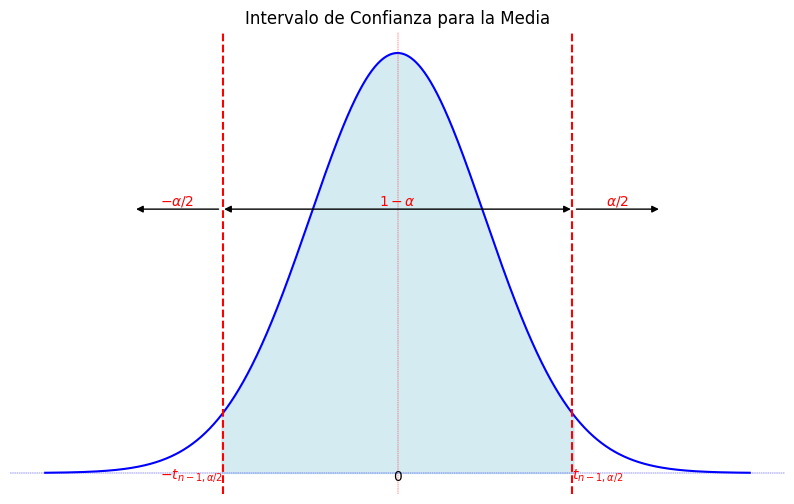

In [ ]:
# @title Crea grafico intervalo para la media
# Par√°metros
n = 100  # Tama√±o de la muestra
alpha = 0.05  # Nivel de confianza

# C√°lculo de los valores cr√≠ticos de la distribuci√≥n t de Student
t_left = -t.ppf(1 - alpha / 2, n - 1)
t_right = t.ppf(1 - alpha / 2, n - 1)

# Definir el rango para la gr√°fica
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, n - 1)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
# Rellenar el √°rea bajo la curva
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='lightblue', alpha=0.5)

# L√≠neas verticales y etiquetas
plt.axvline(0, color='red', linestyle='--', linewidth=0.3)

plt.axhline(0, color='blue', linestyle='--', linewidth=0.3)

plt.axvline(t_left, color='red', linestyle='--')
plt.text(t_left, -0.01, r'$-t_{n-1,\alpha/2}$', ha='right', va='bottom', color='red')
plt.axvline(t_right, color='red', linestyle='--')
plt.text(t_right, -0.01, r'$t_{n-1,\alpha/2}$', ha='left', va='bottom', color='red')

plt.text(0, -0.01, '0', ha='center', va='bottom', color='black')
plt.text(0, 0.25, r'$1-\alpha$', ha='center', va='bottom', color='red')

plt.text(-2.5, 0.25, r'$-\alpha/2$', ha='center', va='bottom', color='red')

plt.text(2.5, 0.25, r'$\alpha/2$', ha='center', va='bottom', color='red')

plt.annotate('', xy=(-2, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))


plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='<|-'))

plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='-|>'))

plt.title('Intervalo de Confianza para la Media')
plt.grid(True)
plt.axis('off')
# Mostrar la gr√°fica
plt.show()


Por lo tanto, el intervalo de confianza para media poblacional $\mu$ con una fiabilidad de $(1-\alpha)\times 100 \%$ es:

$$IC_{1-\alpha} (\mu) = \Big(\bar{X}-t_{n-1\;\alpha/2}\frac{S_{X}}{\sqrt{n}},\bar{X}+t_{n-1\;\alpha/2}\frac{S_{X}}{\sqrt{n}}\Big)=\Big( \bar{X} \pm t_{n-1\;\alpha/2}\frac{S_{X}}{\sqrt{n}}\Big)$$

El error muestral es lo que la media poblacional $\mu$ puede distanciarse de la media muestral $\bar{X}$ con el nivel de confianza establecido. En la expresi√≥n $EM=t_{n-1;\alpha/2}\frac{S_{X}}{\sqrt{n}}$ tenemos que:

* A menor $S_{X}$, menor $EM$. Esto significa que si la muestra es poco dispersa (presenta pocas variaciones), entonces es m√°s probable que $\bar{X}$ se acerque a $\mu$.

* A mayor tama√±o de la muestra $n$, menor $EM$. Obviamente, si el denominador es mayor, el $EM$ ser√° menor. Esto significa que una muestra muy numerosa nos da m√°s informaci√≥n sobre la poblaci√≥n.

* A menor $\alpha$, mayor $EM$. Con un intervalo m√°s amplio tendremos m√°s garant√≠as de *acertar*, lo que se consigue con un mayor nivel de confianza $1-\alpha$.


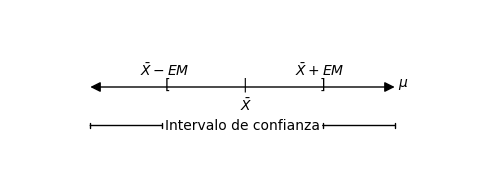

In [ ]:
# @title Crea figura intervalo de confianza para la media
plt.figure(figsize=(6,2))

plt.annotate('', xy=(-2, 0), xytext=(2, 0),size=15,
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))


plt.annotate('[', xy=(-1, -0.01), xytext=(-1, -0.02))
plt.annotate(']', xy=(1, -0.01), xytext=(1, -0.02))

plt.annotate(r'$\mu$', xy=(2, 0), xytext=(2, 0))

plt.annotate('|', xy=(0, -0.01), xytext=(0, -0.02))

plt.text(0.05, -0.35, r'$\bar{X}$', ha='center', va='bottom', color='black')

plt.text(-1, 0.1, r'$\bar{X}-EM$', ha='center', va='bottom', color='black')
plt.text(1, 0.1, r'$\bar{X}+EM$', ha='center', va='bottom', color='black')


plt.annotate('', xy=(-1, -0.5), xytext=(-2, -0.5),size=2,
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))


plt.annotate('', xy=(1, -0.5), xytext=(2, -0.5),size=2,
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))

plt.text(0, -0.6, 'Intervalo de confianza', ha='center', va='bottom', color='black')

# Establece los l√≠mites del gr√°fico
plt.xlim(-3, 3)
plt.ylim(-1, 1)

# Muestra el gr√°fico
plt.axis('off')
plt.grid(True)
plt.show()


### Intervalo de confianza para la proporci√≥n

Para obtener el intervalo de confianza para la proporci√≥n $p$ con nivel de confianza $1-\alpha$ usamos que, si se dan las condiciones de validez, se tiene

$$\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}\thicksim N(0,1)$$


Por lo tanto,

$$1-\alpha=P\Big(-z_{\alpha/2} < \frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}} < z_{\alpha/2}\Big)$$

Se despeja $p$. Para simplificar, si $n$ es grande ($n\geq30$), suponemos que $\hat{p}\approx p$, de manera que la probabilidad anterior sea pr√°cticamente igual si sustituimos en el denominador $p(1-p)$ por $\hat{p}(1-\hat{p})$ y llamemos a $EM = z_{\alpha/2}\sqrt{\hat{p}(1-\hat{p}/n)}$ error muestral, es decir,

\begin{align*}
    1-\alpha&=P(-EM < \hat{p}-p < EM)\\
    &=P(\hat{p}-EM < p < \hat{p}+EM)\\
    &=P(p\in(\hat{p}-EM,\hat{p}+EM))    
\end{align*}

Por lo tanto el intervalo de confianza para la proporci√≥n  $p$ con una fiabilidad del $1-\alpha\times100\%$ es:


\begin{align*}
    IC_{1-\alpha}&=\Big(\hat{p}-z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p}}}{\sqrt{n}},\hat{p}+z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p}}}{\sqrt{n}}\Big)\\
    &=\Big( \hat{p} \pm z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p}}}{\sqrt{n}} \Big)
\end{align*}




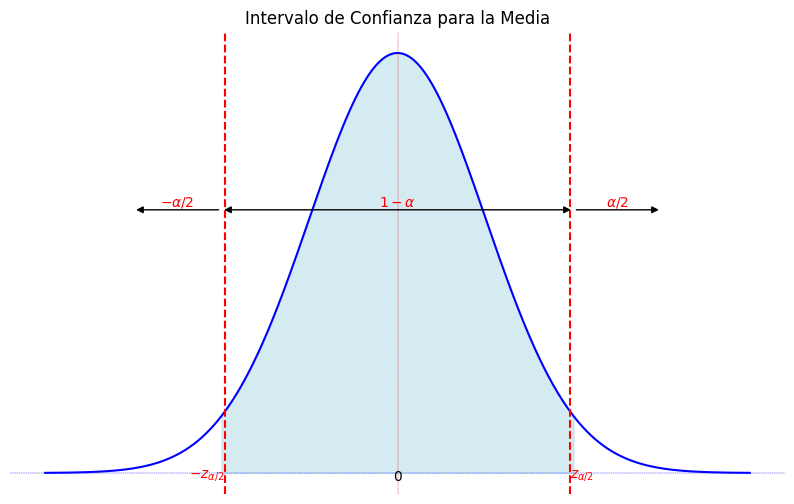

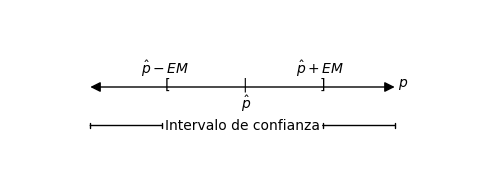

In [ ]:
# @title Crea graficos intervalo para la proporci√≥n
# Par√°metros
n = 100  # Tama√±o de la muestra
alpha = 0.05  # Nivel de confianza

# C√°lculo de los valores cr√≠ticos de la distribuci√≥n normal est√°ndar
z_left = -norm.ppf(1 - alpha / 2)
z_right = norm.ppf(1 - alpha / 2)

# Definir el rango para la gr√°fica
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
# Rellenar el √°rea bajo la curva
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='lightblue', alpha=0.5)

# L√≠neas verticales y etiquetas
plt.axvline(0, color='red', linestyle='--', linewidth=0.3)
plt.axhline(0, color='blue', linestyle='--', linewidth=0.3)

plt.axvline(z_left, color='red', linestyle='--')
plt.text(z_left, -0.01, r'$-z_{\alpha/2}$', ha='right', va='bottom', color='red')
plt.axvline(z_right, color='red', linestyle='--')
plt.text(z_right, -0.01, r'$z_{\alpha/2}$', ha='left', va='bottom', color='red')

plt.text(0, -0.01, '0', ha='center', va='bottom', color='black')
plt.text(0, 0.25, r'$1-\alpha$', ha='center', va='bottom', color='red')

plt.text(-2.5, 0.25, r'$-\alpha/2$', ha='center', va='bottom', color='red')
plt.text(2.5, 0.25, r'$\alpha/2$', ha='center', va='bottom', color='red')

plt.annotate('', xy=(-2, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))

plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='<|-'))

plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='-|>'))

plt.title('Intervalo de Confianza para la Media')
plt.grid(True)
plt.axis('off')
# Mostrar la gr√°fica
plt.show()


################################################
################################################
################################################
################################################
plt.figure(figsize=(6,2))

plt.annotate('', xy=(-2, 0), xytext=(2, 0),size=15,
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))


plt.annotate('[', xy=(-1, -0.01), xytext=(-1, -0.02))
plt.annotate(']', xy=(1, -0.01), xytext=(1, -0.02))

plt.annotate(r'$p$', xy=(2, 0), xytext=(2, 0))

plt.annotate('|', xy=(0, -0.01), xytext=(0, -0.02))

plt.text(0.05, -0.35, r'$\hat{p}$', ha='center', va='bottom', color='black')

plt.text(-1, 0.1, r'$\hat{p}-EM$', ha='center', va='bottom', color='black')
plt.text(1, 0.1, r'$\hat{p}+EM$', ha='center', va='bottom', color='black')


plt.annotate('', xy=(-1, -0.5), xytext=(-2, -0.5),size=2,
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))


plt.annotate('', xy=(1, -0.5), xytext=(2, -0.5),size=2,
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))

plt.text(0, -0.6, 'Intervalo de confianza', ha='center', va='bottom', color='black')

# Establece los l√≠mites del gr√°fico
plt.xlim(-3, 3)
plt.ylim(-1, 1)

# Muestra el gr√°fico
plt.axis('off')
plt.grid(True)
plt.show()



## Contraste de hip√≥tesis

Planteamos una afirmaci√≥n sobre la variable que estudiamos, la **hip√≥tesis nula** $H_{0}$. Para contrastarla tomamos una muestra $X_{1}, X_{2}, ..., X_{n}$ aleatoria e independiente.

Un contraste de hip√≥tesis $H_{0}$ consiste en aplicar un **estad√≠stico** $T(X_{1}, X_{2}, ..., X_{n})$ y determinar, para el **nivel de significaci√≥n** $\alpha >0$ una **regi√≥n de rechazo** $R(\alpha)$ tal que, si $H_{0}$ fuese cierta, la probabilidad de que $T(X_{1}, X_{2}, ..., X_{n})$ tome su valor en $R(\alpha)$ para una muestra aleatoria ser√≠a tan peque√±a como $\alpha$. En tal caso, $T(X_{1}, X_{2}, ..., X_{n}) \in R(\alpha)$, rechazamos $H_{0}$ y nos quedamos con su opuesta, la **hip√≥tesis alternativa** $H_{1}$.

Si en cambio $T(X_{1}, X_{2}, ..., X_{n}) \notin R(\alpha)$, o sea $T(X_{1}, X_{2}, ..., X_{n}) \in R(\alpha)^{c}=RA(\alpha)$ (**la regi√≥n de aceptaci√≥n**), entonces aceptamos $H_{0}$ (o mejor dicho en rigor, no rechazamos $H_{0}$).

En caso de rechazo decimos que tenemos evidencia estad√≠stica suficiente para hacerlo (depende del nivel de significaci√≥n) y en caso contrario no podemos rechazarla porque no tenemos esa evidencia. ***Pero tampoco la tenemos de que $H_{0}$ sea cierta, ¬°el contraste no sirve para demostrar $H_{0}$!***


En muchos contrastes de hip√≥tesis es posible calcular el p-valor, un valor dado por la muestra tal que si es menor que $\alpha$ entones se rechaza $H_{0}$.

Cuando el $p-valor$ es pr√°cticamente nulo significa que nuestros datos contradicen muy claramente $H_{0}$. Esto es, tenemos evidencia estad√≠stica abrumadora en contra de $H_{0}$ y la rechazaremos con cualquier nivel de significaci√≥n razonable.


### Contraste para la media

El contraste (bilateral) de la media en una poblaci√≥n normal consiste en las hip√≥tesis
$$H_{0}:  \mu = \mu_{}  \hspace{0.5cm} \text{frente a} \hspace{0.5cm} H_{1}:  \mu \neq \mu_{}$$
con una muestra de tama√±o $n$, $X_{1}, X_{2}, ..., X_{n}$.


**Condiciones de validez:**

*   Para todo $i, X_{i} \thicksim N(\mu,\sigma)$ independientes.

    Aplicamos el estad√≠stico:

    $$t_{obs}=\frac{\bar{X}-\mu_{0}}{S_{x}/\sqrt{n}}$$

*   Si $H_{0}$ es cierta se tiene que  $t_{obs} \thicksim t_{n-1}$
($t_{obs}$ es una variable aleatoria que retorna un valor para cada muestra de tama√±o $n$).

    Por ello, tomamos para un nivel de significaci√≥n $\alpha>0$, cuya regi√≥n de rechazo es:

    $$R(\alpha)=(-\infty, -t_{(n-1;\alpha/2)}] \cup [t_{(n-1;\alpha/2)},+\infty )$$

    Por lo tanto, rechazamos $H_{0}$ si
    
    $$|t_{obs}| \geq t_{(n-1;\alpha/2)}$$

    O sea, aceptamos (no rechazamos) $H_{0}$ si
    
    $$|t_{obs}| < t_{(n-1;\alpha/2)}$$
    
    La regi√≥n de aceptaci√≥n (de no rechazo) vine dada por:

    $$RA(\alpha) = (-t_{(n-1;\alpha/2)},t_{(n-1;\alpha/2)})$$
    



---

A $t_{obs}$ se le denomina **valor observado** del contraste, y a $t_{(n-1;\alpha/2)}$ se le llama **valor cr√≠tico** del contraste.


***Observaci√≥n:***

Otra forma de realizar el contraste:

\begin{align*}
    t_{obs} \in RA(\alpha) &\Leftrightarrow  -t_{(n-1;\alpha/2)} < \frac{\bar{X}-\mu_{0}}{S_{X}/\sqrt{n}} < t_{(n-1;\alpha/2)}\\
    &\Leftrightarrow \bar{X} - \mu_{0} < EM, \text{ donde  }  EM= t_{n-1;\alpha/2}S_{X}/\sqrt{n} \\
    &\Leftrightarrow \bar{X} -EM < \mu_{0} < \bar{X} +EM\\
    &\Leftrightarrow \mu_{0} \in IC_{1-\alpha}(\mu)
\end{align*}

Esto es, aceptamos $H_{0}$ si y s√≥lo si la media a contrastar esta en el intervalo de confianza que nos proporciona la muestra, para el nivel de confianza $1-\alpha$.




<ipython-input-59-3943b8a12bb0>:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
<ipython-input-59-3943b8a12bb0>:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),


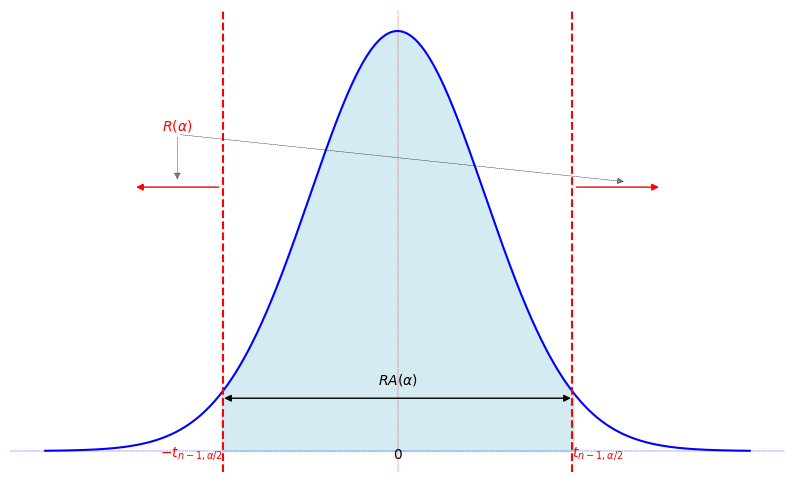

In [ ]:
# @title Crea gr√°fico zona de rechazo/aceptaci√≥n para la media
# Par√°metros
n = 100  # Tama√±o de la muestra
alpha = 0.05  # Nivel de confianza

# C√°lculo de los valores cr√≠ticos de la distribuci√≥n t de Student
t_left = -t.ppf(1 - alpha / 2, n - 1)
t_right = t.ppf(1 - alpha / 2, n - 1)

# Definir el rango para la gr√°fica
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, n - 1)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
# Rellenar el √°rea bajo la curva
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='lightblue', alpha=0.5)

# L√≠neas verticales y etiquetas
plt.axvline(0, color='red', linestyle='--', linewidth=0.3)

plt.axhline(0, color='blue', linestyle='--', linewidth=0.3)

plt.axvline(t_left, color='red', linestyle='--')
plt.text(t_left, -0.01, r'$-t_{n-1,\alpha/2}$', ha='right', va='bottom', color='red')
plt.axvline(t_right, color='red', linestyle='--')
plt.text(t_right, -0.01, r'$t_{n-1,\alpha/2}$', ha='left', va='bottom', color='red')

plt.text(0, -0.01, '0', ha='center', va='bottom', color='black')


plt.text(-2.5, 0.3, r'$R(\alpha)$', ha='center', va='bottom', color='red')


plt.text(0, 0.06, r'$RA(\alpha)$', ha='center', va='bottom', color='black')


plt.annotate('', xy=(-2, 0.05), xytext=(2, 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))




plt.annotate('', xy=(-2.5, 0.30), xytext=(2.6, 0.255),
             arrowprops=dict(facecolor='grey', arrowstyle='<|-',linestyle='dashed', linewidth=0.3))



plt.annotate('', xy=(-2.5, 0.30), xytext=(-2.5, 0.255),
             arrowprops=dict(facecolor='grey', arrowstyle='<|-',linestyle='dashed', linewidth=0.3))



plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
             arrowprops=dict(facecolor='red', arrowstyle='<|-',color='red'))

plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='red', arrowstyle='-|>',color='red'))

plt.axis('off')
# Mostrar la gr√°fica
plt.show()

El $p-valor$ para este contraste mide la probabilidad de que el estad√≠stico $t_{obs}$ se aleje de $0$ al menos una cantidad $|t_{obs}|$, esto es, dado $T \thicksim t_{n-1}$


$$p-valor = P(|T| > |t_{obs}|) = 2P(T > |t_{obs}|)$$



\begin{align*}
    \text{Rechazamos} H_{0} & \Leftrightarrow p-valor = 2P(T > |t_{obs}|) \leq \alpha\\
    & \Leftrightarrow P(T > |t_{obs}| )\leq \frac{\alpha}{2}\\
    & \Leftrightarrow t_{n-1;\alpha/2} \leq |t_{obs}|
\end{align*}

### Contraste para la proporci√≥n

En el contraste (bilateral) de la proporci√≥n se contrasta $p_{0}$ como valor de la proporci√≥n $p$, esto es:

\begin{cases}
    H_{0}: p= p_{0}\\
    H_{1}: p \neq p_{0}
\end{cases}

***Condiciones de validez:***

*   La muestra es independiente y representativa de la poblaci√≥n
*   $n \geq 0$, o bien
    \begin{cases}
        n\hat{p} = k \geq 5\\
        n(1-\hat{p}=n-k \geq 5)
    \end{cases}

El **valor observado** de contraste es el estad√≠stico $$Z_{obs}= \frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}(1-p_{0})}{n}}}$$

Si $H_{0}$ es cierta se tiene que $Z_{obs}$ se distribucye aproximadamente como una normal est√°ndar.
Con esto, y fijando un nivel de significancia $\alpha$, si ocurre $Z_{obs}\geq Z_{\alpha/2}$ o $Z_{obs}\leq -Z_{\alpha/2}$, entonces rechazamos $H_{0}$ (lo que implica quee no se considera fiabl que $p=p_{0}$, porque en tal caso ser√≠a muy extra√±o que la muestra fuera as√≠).


La muestra est√° en la **regi√≥n de rechazo** $R(\alpha) \Leftrightarrow |Z_{obs}| \geq Z_{\alpha/2}$.

La muestra est√° en la **regi√≥n de aceptaci√≥n**  $RA(\alpha) \Leftrightarrow Z_{obs} \in (-Z_{\alpha/2},Z_{\alpha/2})$.

Sea $Z \thicksim N(0,1)$,




\begin{align*}
    \text{Rechazamos } H_{0} & \Leftrightarrow p-valor = P(|Z| > |Z_{obs}| )=2P(Z > |Z_{obs}|) \leq \alpha\\
    & \Leftrightarrow P(Z > |Z_{obs}| )\leq \frac{\alpha}{2}\\
    & \Leftrightarrow Z_{\alpha/2} \leq |Z_{obs}|
\end{align*}


<ipython-input-60-02f51b890c18>:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
<ipython-input-60-02f51b890c18>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),


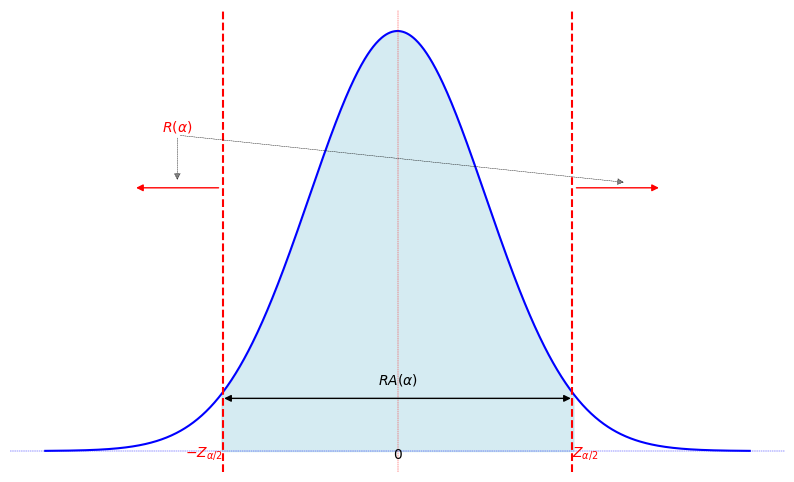

In [ ]:
# @title Crea gr√°fico zona de rechazo/aceptaci√≥n para la proporci√≥n
# Par√°metros
# Par√°metros
n = 100  # Tama√±o de la muestra
alpha = 0.05  # Nivel de confianza

# C√°lculo de los valores cr√≠ticos de la distribuci√≥n normal est√°ndar
z_left = -norm.ppf(1 - alpha / 2)
z_right = norm.ppf(1 - alpha / 2)

# Definir el rango para la gr√°fica
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
# Rellenar el √°rea bajo la curva
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='lightblue', alpha=0.5)

# L√≠neas verticales y etiquetas
plt.axvline(0, color='red', linestyle='--', linewidth=0.3)

plt.axhline(0, color='blue', linestyle='--', linewidth=0.3)

plt.axvline(t_left, color='red', linestyle='--')
plt.text(t_left, -0.01, r'$-Z_{\alpha/2}$', ha='right', va='bottom', color='red')
plt.axvline(t_right, color='red', linestyle='--')
plt.text(t_right, -0.01, r'$Z_{\alpha/2}$', ha='left', va='bottom', color='red')

plt.text(0, -0.01, '0', ha='center', va='bottom', color='black')


plt.text(-2.5, 0.3, r'$R(\alpha)$', ha='center', va='bottom', color='red')


plt.text(0, 0.06, r'$RA(\alpha)$', ha='center', va='bottom', color='black')


plt.annotate('', xy=(-2, 0.05), xytext=(2, 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))




plt.annotate('', xy=(-2.5, 0.30), xytext=(2.6, 0.255),
             arrowprops=dict(facecolor='grey', arrowstyle='<|-',linestyle='dashed', linewidth=0.3))



plt.annotate('', xy=(-2.5, 0.30), xytext=(-2.5, 0.255),
             arrowprops=dict(facecolor='grey', arrowstyle='<|-',linestyle='dashed', linewidth=0.3))



plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
             arrowprops=dict(facecolor='red', arrowstyle='<|-',color='red'))

plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='red', arrowstyle='-|>',color='red'))

plt.axis('off')
# Mostrar la gr√°fica
plt.show()

## Consideraciones sobre la muestra:



*   **Obtenci√≥n**: Debe ser independiente (los valores de cada caso no deben tener influencia en los dem√°s) y tambi√©n representativa (se necesita, para que la inferencia sea justificada, esperar que los valores de la muestra se asemejen en principio a los que se dan en toda la poblaci√≥n).

*   **Tama√±o de la muestra**: Cuando calculamos un intervalo de confianza el grado de imprecisi√≥n lo da el error muestral. Obviamente, es menor cuanto mayor es el tama√±o de la muestra, pero puede ser impracticable (o tal vez car√≠simo) conseguir que el tama√±o sea muy grande. Lo que se hace es calcular el tama√±o que necesitar√≠amos para no rebasar un error muestral objetivo, y luego decidir en consecuencia.






### Tama√±o de la muestra para la media

En la inferencia sobre la media de una poblaci√≥n normal vimos que el error muestral se calcula
$$EM= t_{n-1;\alpha/2}\frac{S_{X}}{n}$$

Llamamos $EM_{obj}$ a nuestro objetivo y necesitamos que

$$t_{n-1;\alpha/2}\frac{S_{X}}{\sqrt{n}} \leq EM_{obj}$$

Para poder *despejar* $n$ sustituimos $t_{n-1;\alpha/2}$ por $Z_{\alpha/2}$.
Obviamente no tenemos $S_{X}$, por lo que tomamos $S$, ya sea la *cuasivarianza* t√≠pica de una muestra previa o alguna otra estimaci√≥n fiable de la desviaci√≥n t√≠pica poblacional.

Buscamos entonces:

$$Z_{\alpha/2}\frac{S}{\sqrt{n}} \leq EM_{obj} \Leftrightarrow Z_{\alpha/2}\frac{S}{EM_{obj}} \leq \sqrt{n} \Leftrightarrow n \geq Z_{\alpha/2}^{2}\frac{S^{2}}{EM_{obj}^{2}}$$



### Tama√±o de la muestra para la proporci√≥n

Vimos qu el error muestral para $IC_{1-\alpha}(p)$ es:

$$EM = z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

Nos planteamos dos situaciones:

*   Hemos obtenido ya $\hat{p}$ con una muestra y queremos calcular $n$ para conseguir un valor $EM_{obj}$ *(error muestral objetivo)* con la misma $\hat{p}$.

    Por lo tanto tenemos:

    
$$Z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p})}}{\sqrt{n}} \leq EM_{obj} \Leftrightarrow Z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p})}}{EM_{obj}} \leq \sqrt{n} \Leftrightarrow n \geq Z_{\alpha/2}^{2}\frac{\hat{p}(1-\hat{p})}{EM_{obj}^{2}}$$

*   Queremos conseguir un valor $EM_{obj}$ independientemente de qu√© $\hat{p}$ obtengamos.
Entonces, cambiamos $\hat{p}(1-\hat{p})$ por su m√°ximo valor posible en $\hat{p} \in (0,1)$, que es cuando $\hat{p}=1/2$, en cuyo caso, $\hat{p}(1-\hat{p})=1/4$.
Tomamos entonces

$$n \geq Z_{\alpha/2}^{2} \frac{1}{4EM^{2}_{obj}}$$


***NOTA:***

En ambas situaciones, como nos basamos en la aproximaci√≥n a la distribuci√≥n normal est√°ndar de $$\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}$$ para dar por bueno lo anterior, necesitamos obtener $n \geq 30$.





## RESUMEN:

| Sobre la media                                                                 | Sobre la proporci√≥n                                                      |
|--------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| - Intervalo de Confianza:                                                      | - Intervalo de confianza:                                                |
|                                                                                  |                                                                           |
| $$\Big( \bar{X} \pm t_{n-1\;\alpha/2}\frac{S_{X}}{\sqrt{n}}\Big)$$             | $$\Big( \hat{p} \pm z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p})}}{\sqrt{n}} \Big)$$ |
|                                                                                  |                                                                           |
| - Contraste de hip√≥tesis:                                                       | - Contraste de hip√≥tesis:                                                |
|                                                                                  |                                                                           |
| $$t_{obs}=\frac{\bar{X}-\mu_{0}}{S_{x}/\sqrt{n}},$$                            | $$Z_{obs}= \frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}(1-p_{0})}{n}}},$$        |
| $$RA(\alpha) = (\pm t_{(n-1;\alpha/2)}),$$                                      | $$RA(\alpha) = (\pm Z_{\alpha/2}),$$                                      |
| $$p-valor = 2P(T > |t_{obs}|) \text{ con } T \thicksim t_{n-1}$$                | $$p-valor = 2P(Z > |Z_{obs}|) \text{ con } Z \thicksim N(0,1)$$           |
|                                                                                  |                                                                           |
| - Tama√±o de la muestra:                                                         | - Tama√±o de la muestra:                                                   |
|                                                                                  |                                                                           |
| $$n \geq Z_{\alpha/2}^{2} \frac{S^{2}}{EM^{2}_{obj}}$$                         | - Con informaci√≥n muestral:                                              |
|                                                                                  |                                                                           |
|                                                                                  | $$n \geq Z_{\alpha/2}^{2}\frac{\hat{p}(1-\hat{p})}{EM_{obj}^{2}}$$        |
|                                                                                  |                                                                           |
|                                                                                  | - Sin informaci√≥n adicional:                                              |
|                                                                                  |                                                                           |
|                                                                                  | $$n \geq Z_{\alpha/2}^{2} \frac{1}{4EM^{2}_{obj}}$$                       |




***
***


# Estad√≠stica Multivariante

Estudiamos los datos, en $N$ casos, en primer lugar, de ***dos*** variables $X$ e $Y$. Queremos analizar la relaci√≥n entre ellas y medir el grado de asociaci√≥n detectada. En este contexto, la distribuci√≥n marginal de $X$ es la de dicha variable por s√≠ sola, sin tener en cuenta los valores de $Y$.

*   **Datos cuantitativos:**
    *   *Presentaci√≥n de los datos:* tabla de frecuencias de doble entrada.
    *   *Relaci√≥n lineal y covarianza:* recta de regresi√≥n (con predicci√≥n), coeficiente de correlaci√≥n y coeficiente de determinaci√≥n.

*   **Datos cualitativos:**
    *   *Variables ordinales:* coeficiente de correlaci√≥n por rangos.
    *   *Variables categ√≥ricas no ordinales:* tabla de contingencia y $Q$ de Yule.




### Tablas de frecuencia de doble entrada

Se parte de dos variables $X$ e $y$ tomadas en $N$ casos. En las filas se indican los valores (o las marcas de clase de los intervalos) de $X$ y en las columnas los de $Y$. El valor de la fila $i$ y la columna $j$ es la frecuencia absoluta (n√∫mero de casos) que se sit√∫an en el $i$-√©simo valor (o intervalo) de $X$ y el $j$-√©simo de $Y : n_{ij}$.

La tabla se completa a√±adiendo una nueva columna que refleja las frecuencias marginales de $X (n_{i}: \text{ frecuencia absoluta del i-√©simo valor de } X)$, y una nueva fila con las frecuencias marginales de $Y (n_{j}: \text{ frecuencia absoluta del j-√©simo valor de } Y)$

Tambi√©n se pueden calcular las frecuencias relativas, aunque estas no se suelen ubicar en la tabla. Se calculan haciendo el cociente con la frecuencia total de casos:

$$f_{ij}=\frac{n_{ij}}{N}; f_{i}=\frac{n_{i}}{N}; f_{j}=\frac{n_{j}}{N} $$


Esta informaci√≥n puede ser presentada en formato largo por columnas, donde cada fila recoge el par $x_{i}$ e $y_{i}$ junto con su frecuencia $n_{ij}$.


## Ejemplo:

<!-- **Objetivo**: Teniendo en cuenta el texto que venimos trabajando, construir una tabla de frecuencias de doble entrada para analizar la relaci√≥n entre el n√∫mero de palabras con longitud $\geq 10$ y el n√∫mero de palabras que comienzan con la letra $e$


**Variables**:

*   **Variable X**: N√∫mero de palabras .

*   **Variable Y**: Longitud del texto de la rese√±a (N√∫mero de palabras utilizadas). -->


In [ ]:
# # Dividir el texto en palabras
# palabras = texto_limpio.split()

# # Contar palabras con longitud mayor o igual a 10 caracteres
# num_palabras_largas = sum(1 for palabra in palabras if len(palabra) >= 10)

# # Contar palabras que comienzan con "e" y tienen longitud mayor o igual a 10 caracteres
# num_palabras_e_largas = sum(1 for palabra in palabras if len(palabra) >= 10 and palabra.lower().startswith('e'))

# # Calcular la probabilidad condicionada
# probabilidad_condicionada = num_palabras_e_largas / num_palabras_largas

# print("N√∫mero total de palabras con longitud mayor o igual a 10:", num_palabras_largas)
# print("N√∫mero de palabras que comienzan con 'e' y tienen longitud mayor o igual a 10:", num_palabras_e_largas)
# print("Probabilidad de que una palabra comience con 'e' dado que tiene longitud mayor o igual a 10:", probabilidad_condicionada)

## Covarianza

La **covarianza** entre $X$ e $Y$ (de manera que $X_{i}$ e $Y_{i}$ son, respectivamente, los valores de $X$ e $Y$ en cada caso $i=1, 2, ..., N$) es:

$$cov(X,Y)= S_{X,Y}=\frac{1}{N} \sum_{i=1}^{N}(X_{i}-\bar{X})(Y_{i}-\bar{Y}).$$

Operando se puede observar que la covarianza es igual a la media del producto menos el producto de las medias, que deriva en la expresi√≥n que depende de las sumas, esto es:

$$cov(X,Y)=\overline{X.Y}-\bar{X}-\bar{Y}= \frac{1}{N}\Big[\sum_{i=1}^{N}(X_{i}Y_{i})-\frac{(\sum_{i=1}^{N}X_{i})(\sum_{i=1}^{N}Y_{i})}{N}\Big]$$

***Observaci√≥n:***

La covarianza de una variable consigo misma es la varianza de la variable:

$$cov(X,X)= S_{X,X}=\frac{1}{N} \sum_{i=1}^{N}(X_{i}-\bar{X})(X_{i}-\bar{Y})=\frac{1}{N}\sum_{i=1}^{N}(X_{i}-\bar{X})^{2}=S_{x}^{2}$$

### Ejercicio:

### Interpretaci√≥n de la covarianza:

La expresi√≥n de la definici√≥n es √∫til para entender el significado del signo de la covarianza:

*   $cov(X,Y)>0$: Si a valores grandes de $X$ les corresponden valores grandes de $Y$ e √≠dem peque√±os-peque√±os, entonces en los sumandos de la definici√≥n $X_{i}-\bar{X}$ e $Y_{i}-\bar{Y}$ normalmente tienen el mismo signo y su producto es positivo, luego predominan los sumandos positivos. Si las frecuencias m√°s altas se dan en la diagonal descendente de la tabla de doble entrada, se intuye que la covarianza ser√° positiva.


*   $cov(X,Y)< 0$: Si a valores grandes de $X$ les corresponden valores peque√±os de $Y$ y viceversa. Predominan los sumandos negativos porque los signos de $X_{i}-\bar{X}$ e $Y_{i}-\bar{Y}$ normalmente son opuestos. Si las frecuencias m√°s altas se dan en la diagonal ascendente de la tabla de doble entrada, se espera que la covarianza sea negativa.


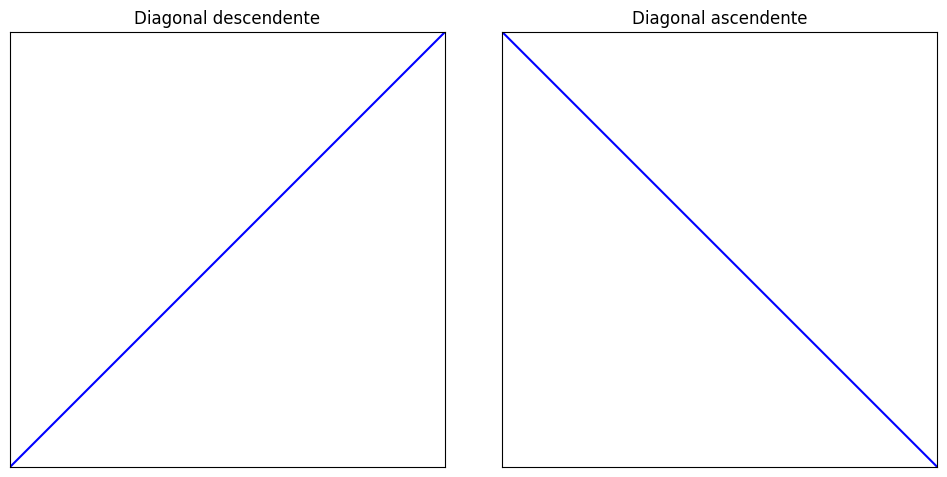

In [ ]:
# @title Crea gr√°fico signo de la covarianza
# Crear una nueva figura y ejes con dos subgr√°ficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Para el primer subgr√°fico
ax1.plot([0, 1], [0, 1], color='blue')  # L√≠nea diagonal descendente
ax1.set_title('Diagonal descendente')

# Para el segundo subgr√°fico
ax2.plot([0, 1], [1, 0], color='blue')  # L√≠nea diagonal ascendente
ax2.set_title('Diagonal ascendente')

# Ajustar los l√≠mites de los ejes para ambos subgr√°ficos
for ax in (ax1, ax2):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', 'box')

# Mostrar el gr√°fico
plt.tight_layout()
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()



## Propiedades de la covarianza


**Propiedades**. La covarianza es independiente del orden de las variables, no le afectan los cambios de origen, pero s√≠ los de escala. Dadas $X$ e $Y$ variables tomadas sobre los mismos casos; las constantes a, b, c y d; y las variables transformadas $U=a+bX$ $V=c+dY$. Se cumplen las siguientes igualdades:



*   cov(X,Y) = cov(Y,X)
*   cov(U,Y) = cov(a+bX,Y) = b cov(X,Y)
*   cov(X,V) = cov(X,c+dY) = d cpv (X,Y)
*   cov(U,V) = cov(a+bX,c+dY) = bc cov (X,Y)



La **cuasicovarianza** se define de manera an√°loga a la cuasivarianza y resulta:


$$S_{X,Y}= \frac{1}{}N-1\sum_{i=1}^{N}(X_{i}-\bar{X})(Y_{i}-\bar{Y})=\frac{1}{N-1}\Big[  \sum_{i=1}^{N} (X_{i}Y_{i})-\frac{(\sum_{i=1}^{N}X_{i})(\sum_{i=1}^{N}Y_{i})}{N} \Big] = \frac{N}{N-1}S_{X,Y}$$



## Regresi√≥n Lineal

Sean las variables $X$ e $Y$ (de manera que $X_{i}$ e $Y_{i}$ son, respectivamente, los valores de $X$ e $Y$ en cada caso $i=1,...,N$), la **recta de regresi√≥n** $r_{Y|X}$ es la recta $Y^{*}=a+bX$ para la que es m√≠nimo

$$\sum_{i=1}^{N}e_{i}^{2}=\sum_{i=1}^{N}(Y_{i}^{*}-Y_{i})^{2}=\sum_{i=1}^{N}(a+bX_{i}-Y_{i})^{2}$$

Esto se consigue tomando los valores

$$b=\frac{S_{X,Y}}{S_{X}^{2}},$$

y $$a=\bar{Y}-b\bar{X},$$

por lo tanto, $\bar{Y}=a+b\bar{X}$, esto es, la recta pasa por el punto $(\bar{X},\bar{Y}).$

Se denota $r_{Y|X}\equiv a+bX$. A $X$ se le denomina la **variaable explicaativa**, e $Y$ es la **variable explicada**.


**Ejercicio.**